# Scraping NikeRunClub App Reviews

Nama : Dewi Maharani

NRP : 5026221046

Kelas : PBA (B)

# SET UP

In [277]:
# Install libraries
!pip install google_play_scraper
!pip install textblob
!pip install emoji
!pip install seaborn

In [278]:
# Import Libraries
# Standard libraries
import os
import time
import datetime
import re
from pathlib import Path
from PIL import Image

# Data handling and visualization libraries
import pandas as pd
import numpy as np
import nltk
import string
import emoji
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns

# Machine learning and NLP libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Google Play Scraper
from google_play_scraper import app, Sort, reviews, reviews_all

# Utility Libraries
from copy import deepcopy
from IPython.display import clear_output

# Matplotlib & Seaborn Configuration
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")  # Menggunakan seaborn style
plt.rcParams["figure.figsize"] = (15, 10)

print("Libraries imported successfully.")


Libraries imported successfully.


# Scraping

- Nama aplikasi yang akan di-scraping review-nya pada Google Play adalah Nike Run Club - Running Coach

- Link App Android dari Nike Run Club pada Google Play : https://play.google.com/store/apps/details?id=com.nike.plusgps&hl=en

- ID aplikasi Nike Run Club adalah com.nike.plusgps

- Pada tanggal 16 Maret 2025, jumlah review aplikasi pada Google Play adalah 1.08 juta


In [279]:
# Mengambil semua review dari aplikasi Nike Run Club
nike_reviews = reviews_all(
    'com.nike.plusgps',  # ID aplikasi Nike Run Club
    sleep_milliseconds=0,  # Tidak ada jeda antar request
    lang='en',  # Bahasa Inggris
    sort=Sort.NEWEST,  # Urutkan berdasarkan yang terbaru
)

In [280]:
# Simpan hasil scraping ke dalam DataFrame
df_nike_reviews = pd.DataFrame(np.array(nike_reviews), columns=['content'])
df_nike_reviews = df_nike_reviews.join(pd.DataFrame(df_nike_reviews.pop('content').tolist()))

In [281]:
df_nike_reviews

reviewId       userName  \
0       21cc5383-5655-4240-a01a-a074d10c3dab  A Google user   
1       c336f003-8a85-4c24-bbcd-624f61c4e3d2  A Google user   
2       9d3c7b0e-84e4-4498-8b63-a9c69979f05c  A Google user   
3       34f89c24-33db-486a-9748-94962735ada7  A Google user   
4       220c5cab-de9b-4a88-bebe-69e83d0b78cf  A Google user   
...                                      ...            ...   
126477  693ad724-e2d7-4aa9-9aa6-dbde8180286b  A Google user   
126478  a7cc2172-a575-4f55-b77b-3bbe386ba0e1  A Google user   
126479  e9a1307d-8cdd-4b20-82ee-689148e9d9c2  A Google user   
126480  1cbaec91-d507-4ccb-ab41-2204352b39ce  A Google user   
126481  8a0ae616-ca7d-4a0c-b812-81723b404b88  A Google user   

                                                userImage  \
0       https://play-lh.googleusercontent.com/EGemoI2N...   
1       https://play-lh.googleusercontent.com/EGemoI2N...   
2       https://play-lh.googleusercontent.com/EGemoI2N...   
3       https://play-lh.googleusercontent.com/EGemoI2N...   
4       https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                   ...   
126477  https://play-lh.googleusercontent.com/EGemoI2N...   
126478  https://play-lh.googleusercontent.com/EGemoI2N...   
126479  https://play-lh.googleusercontent.com/EGemoI2N...   
126480  https://play-lh.googleusercontent.com/EGemoI2N...   
126481  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                  content  score  \
0                                        The Best ever ❤️      5   
1       Great app that encourages you to push yourself...      5   
2       since March 15th, the app couldnt synced to Ga...      3   
3                 Fantastic app using for last five years      5   
4       I am trying to sign in from 2 month, it is not...      1   
...                                                   ...    ...   
126477  Great for anyone who starts running or training!!      5   
126478  This is soooo much better then the Iphone app!...      5   
126479  Just completed my first run with this new app ...      5   
126480                                Excellent App!!!!!!      5   
126481  I have been waiting a long time for Nike to co...      5   

        thumbsUpCount reviewCreatedVersion                  at replyContent  \
0                   0               4.64.0 2025-03-19 03:54:34         None   
1                   0               4.64.0 2025-03-19 02:43:41         None   
2                   0               4.64.0 2025-03-19 02:01:27         None   
3                   0               4.64.0 2025-03-19 01:45:27         None   
4                   0               4.64.0 2025-03-19 01:03:35         None   
...               ...                  ...                 ...          ...   
126477              0                 None 2012-06-21 23:31:12         None   
126478              1                 None 2012-06-21 23:16:50         None   
126479              6                1.0.0 2012-06-21 23:11:38         None   
126480              2                1.0.0 2012-06-21 23:03:17         None   
126481              2                 None 2012-06-21 18:18:07         None   

       repliedAt appVersion  
0            NaT     4.64.0  
1            NaT     4.64.0  
2            NaT     4.64.0  
3            NaT     4.64.0  
4            NaT     4.64.0  
...          ...        ...  
126477       NaT       None  
126478       NaT       None  
126479       NaT      1.0.0  
126480       NaT      1.0.0  
126481       NaT       None  

[126482 rows x 11 columns]

In [282]:
# Menampilkan jumlah baris dan kolom DataFrame
print(f"Jumlah data yang telah di-scraping: {df_nike_reviews.shape[0]}")

Jumlah data yang telah di-scraping: 126482


In [283]:
# Simpan DataFrame ke dalam file CSV di direktori saat ini
file_path = 'nike_run_club_reviews.csv'

# Simpan DataFrame ke dalam file CSV
df_nike_reviews.to_csv(file_path, index=False, encoding="utf-8")

print(f"DataFrame telah disimpan ke {file_path}")

DataFrame telah disimpan ke nike_run_club_reviews.csv


# Cleaning Dataframe


In [284]:
!pip install langdetect


In [285]:
!pip install --upgrade pip

In [286]:
!pip install --no-cache-dir langdetect

<ipython-input-287-f221051e7e81>:8: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nike_reviews = pd.read_csv('nike_run_club_reviews.csv')


Distribusi Skor Review:
score
5    74029
4    20738
1    15245
3     9347
2     7123
Name: count, dtype: int64


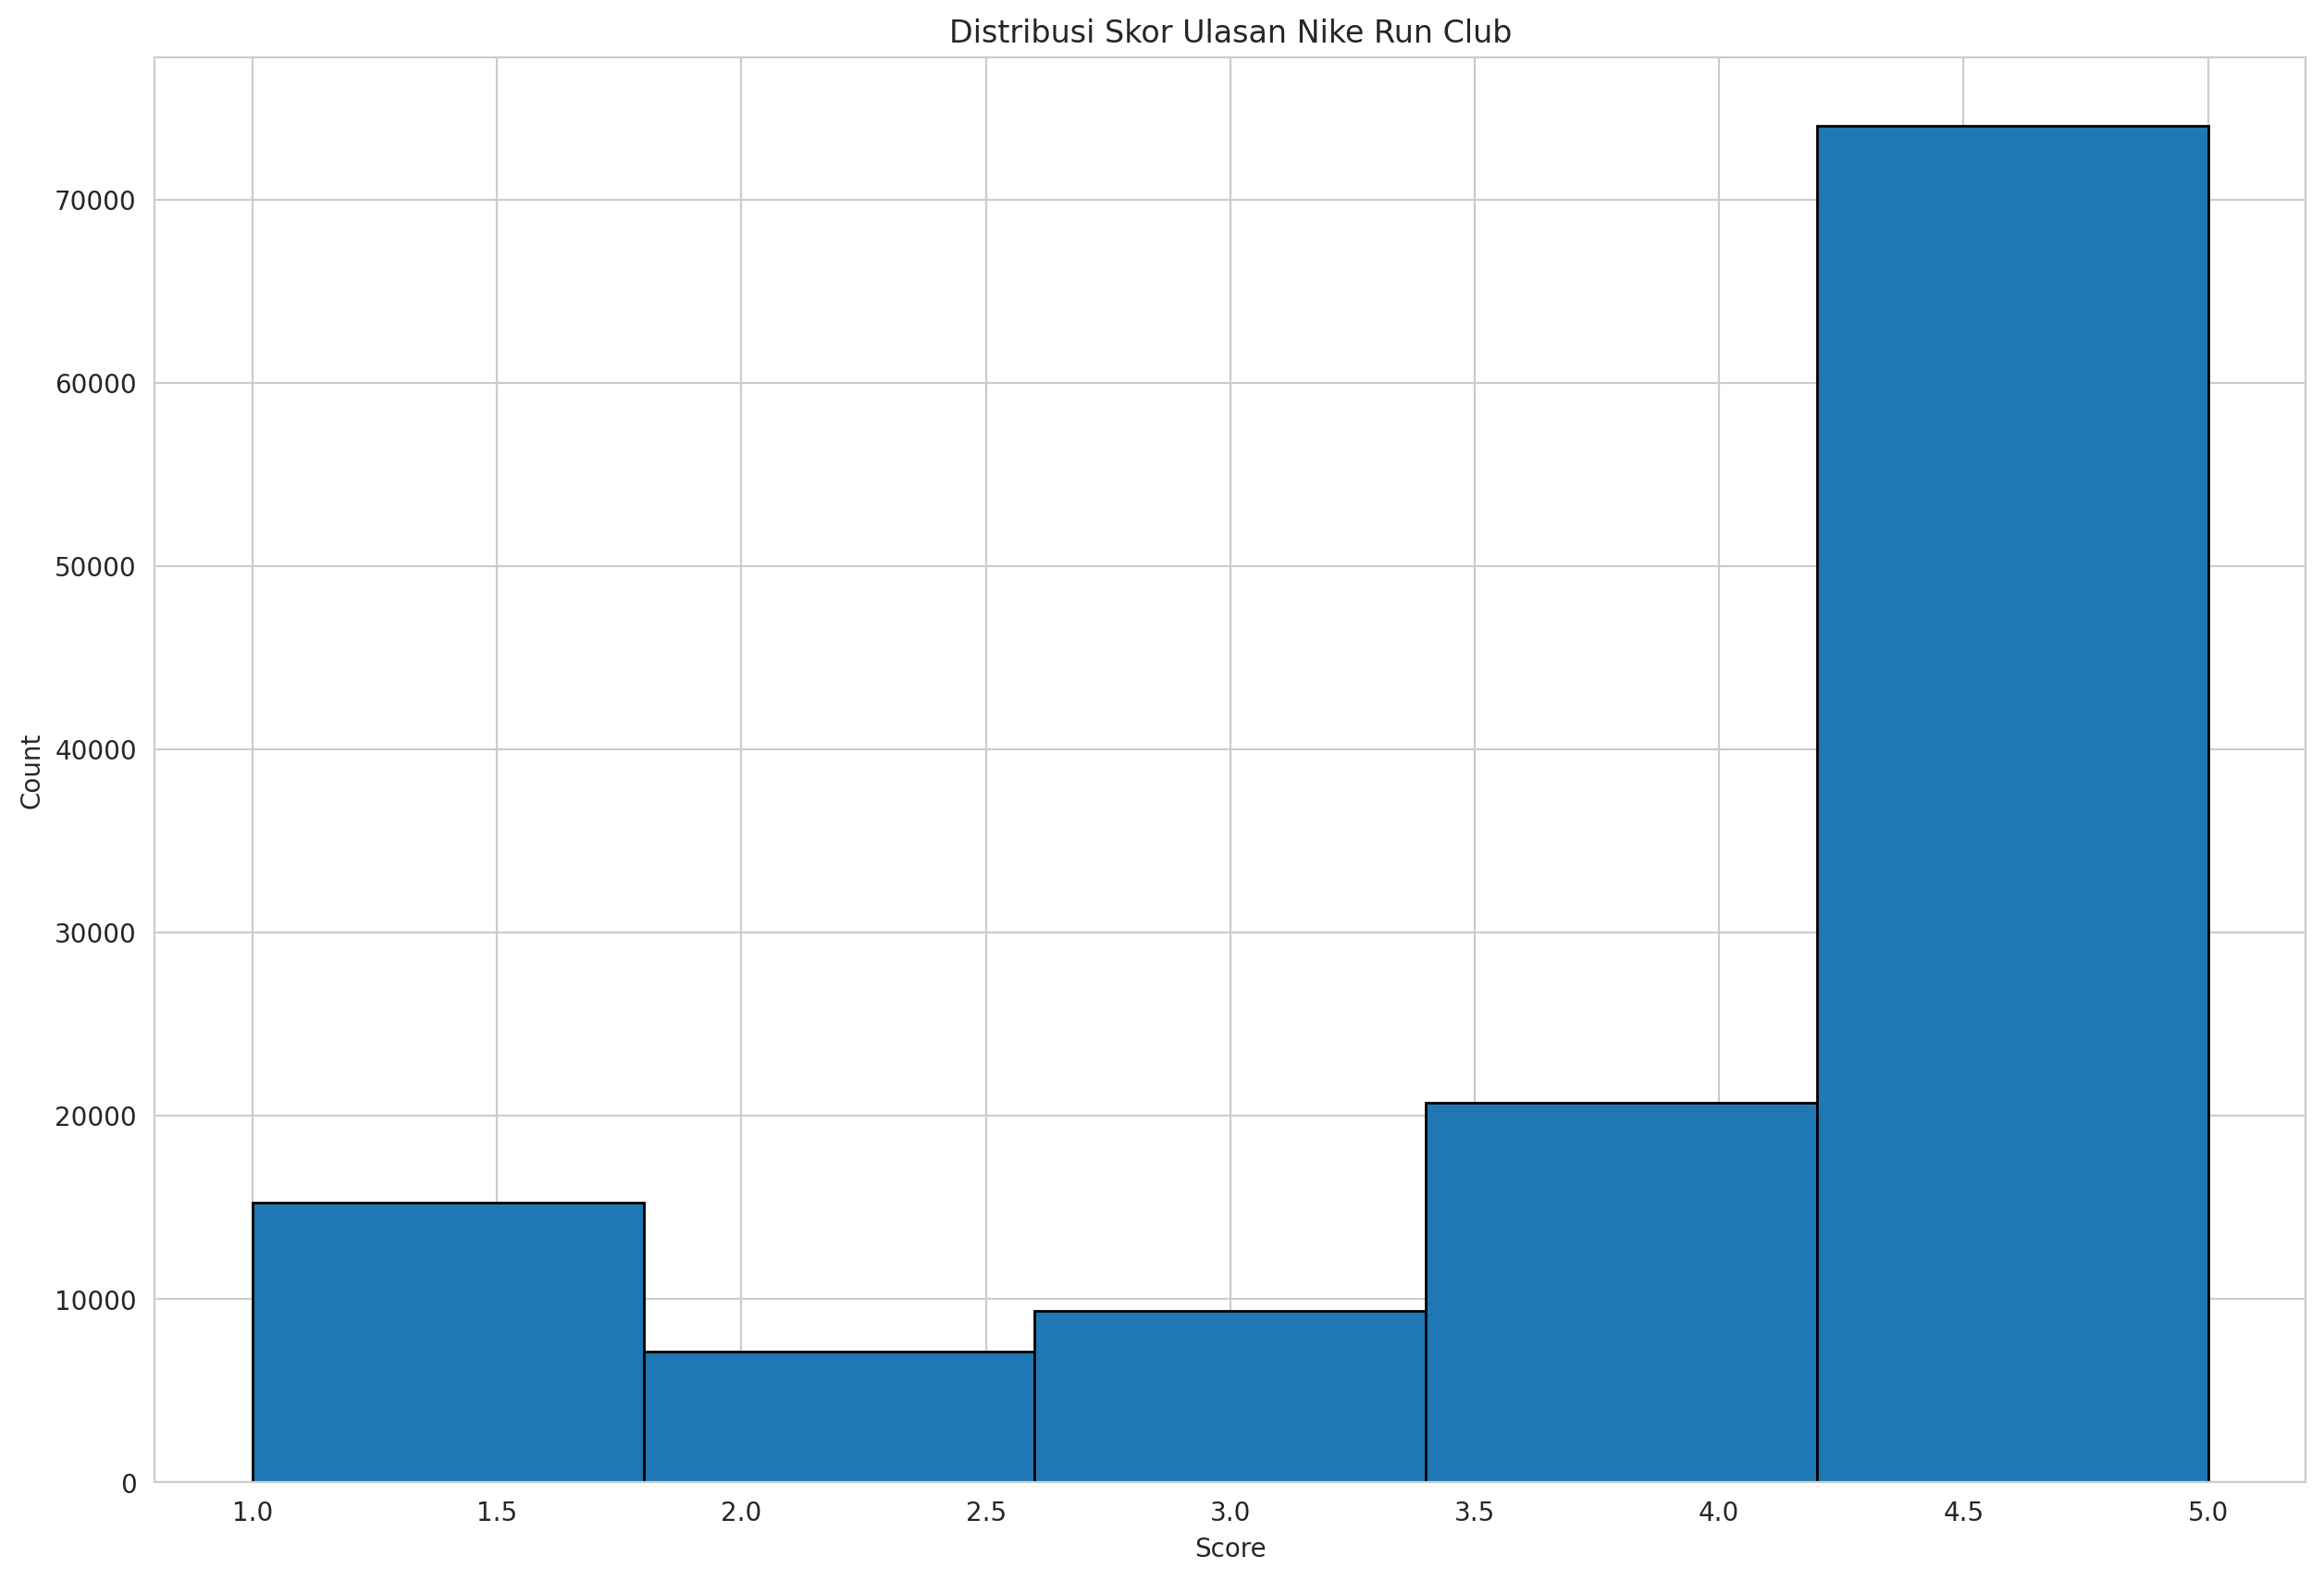


Jumlah bahasa yang terdeteksi:
language
en         103752
af           3434
no           2699
so           2090
ro           1537
it           1453
tl           1230
sl           1220
fr           1149
ca           1021
de            728
id            674
es            660
sw            563
unknown       506
nl            459
pt            381
da            366
et            359
pl            330
cy            325
sv            253
sq            209
fi            175
hu            112
hr            109
tr             91
ru             84
ar             83
cs             67
vi             55
th             54
sk             52
ko             39
lt             35
lv             21
zh-cn          19
fa             13
he             12
ja             11
bg             10
hi             10
ur              8
uk              7
el              4
zh-tw           4
mr              2
kn              2
mk              2
ta              2
ne              1
Name: count, dtype: int64

Data jumlah ba

In [287]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect, LangDetectException
from collections import Counter

# Baca ulang DataFrame dari CSV (pastikan file ada di direktori yang benar)
df_nike_reviews = pd.read_csv('nike_run_club_reviews.csv')

# Tambahkan kolom ID Incremental
df_nike_reviews['id'] = range(1, len(df_nike_reviews) + 1)

# Hapus kolom yang tidak dibutuhkan (cek apakah kolom ini ada sebelum menghapus)
columns_to_drop = ["reviewId", "userName", "userImage", "replyContent", "repliedAt"]
df_nike_reviews = df_nike_reviews.drop(columns=[col for col in columns_to_drop if col in df_nike_reviews.columns])

# Menampilkan jumlah skor review
print("Distribusi Skor Review:")
print(df_nike_reviews['score'].value_counts())

# Plot histogram distribusi skor
plt.hist(df_nike_reviews['score'], bins=5, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribusi Skor Ulasan Nike Run Club')
plt.show()

# Fungsi untuk mendeteksi bahasa
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Perbaikan: Pastikan kolom 'content' tidak memiliki NaN dan dikonversi ke string
df_nike_reviews['content'] = df_nike_reviews['content'].astype(str).fillna("")

# Tambahkan kolom bahasa yang terdeteksi
df_nike_reviews['language'] = df_nike_reviews['content'].apply(detect_language)

# Tampilkan jumlah bahasa yang terdeteksi sebelum difilter
print("\nJumlah bahasa yang terdeteksi:")
print(df_nike_reviews['language'].value_counts())

# Filter hanya review berbahasa Inggris
df_nike_reviews = df_nike_reviews[df_nike_reviews['language'] == 'en']

# Hitung jumlah masing-masing bahasa yang terdeteksi
language_counts = Counter(df_nike_reviews['language'])

# Buat DataFrame dari hasil perhitungan bahasa
language_df = pd.DataFrame.from_dict(language_counts, orient='index', columns=['count'])
language_df.index.name = 'language'
language_df = language_df.sort_values(by='count', ascending=False).reset_index()

# Tampilkan hasil jumlah bahasa yang terdeteksi
print("\nData jumlah bahasa yang tersaring:")
print(language_df)

# Tampilkan informasi DataFrame setelah filtering
print("\nInformasi DataFrame setelah filtering:")
df_nike_reviews.info()


In [288]:
# Filter hanya review berbahasa Inggris
df_nike_reviews = df_nike_reviews[df_nike_reviews['language'] == 'en']

# Tampilkan informasi DataFrame setelah filtering
df_nike_reviews.info()

# Hapus kolom 'language' setelah filtering
df_nike_reviews = df_nike_reviews.drop(columns=["language"])


<class 'pandas.core.frame.DataFrame'>
Index: 103752 entries, 0 to 126481
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   content               103752 non-null  object
 1   score                 103752 non-null  int64 
 2   thumbsUpCount         103752 non-null  int64 
 3   reviewCreatedVersion  96186 non-null   object
 4   at                    103752 non-null  object
 5   appVersion            96186 non-null   object
 6   id                    103752 non-null  int64 
 7   language              103752 non-null  object
dtypes: int64(3), object(5)
memory usage: 7.1+ MB


In [289]:
df_nike_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103752 entries, 0 to 126481
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   content               103752 non-null  object
 1   score                 103752 non-null  int64 
 2   thumbsUpCount         103752 non-null  int64 
 3   reviewCreatedVersion  96186 non-null   object
 4   at                    103752 non-null  object
 5   appVersion            96186 non-null   object
 6   id                    103752 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.3+ MB


# Polaritas Sentimen sebelum Text Preprocessing

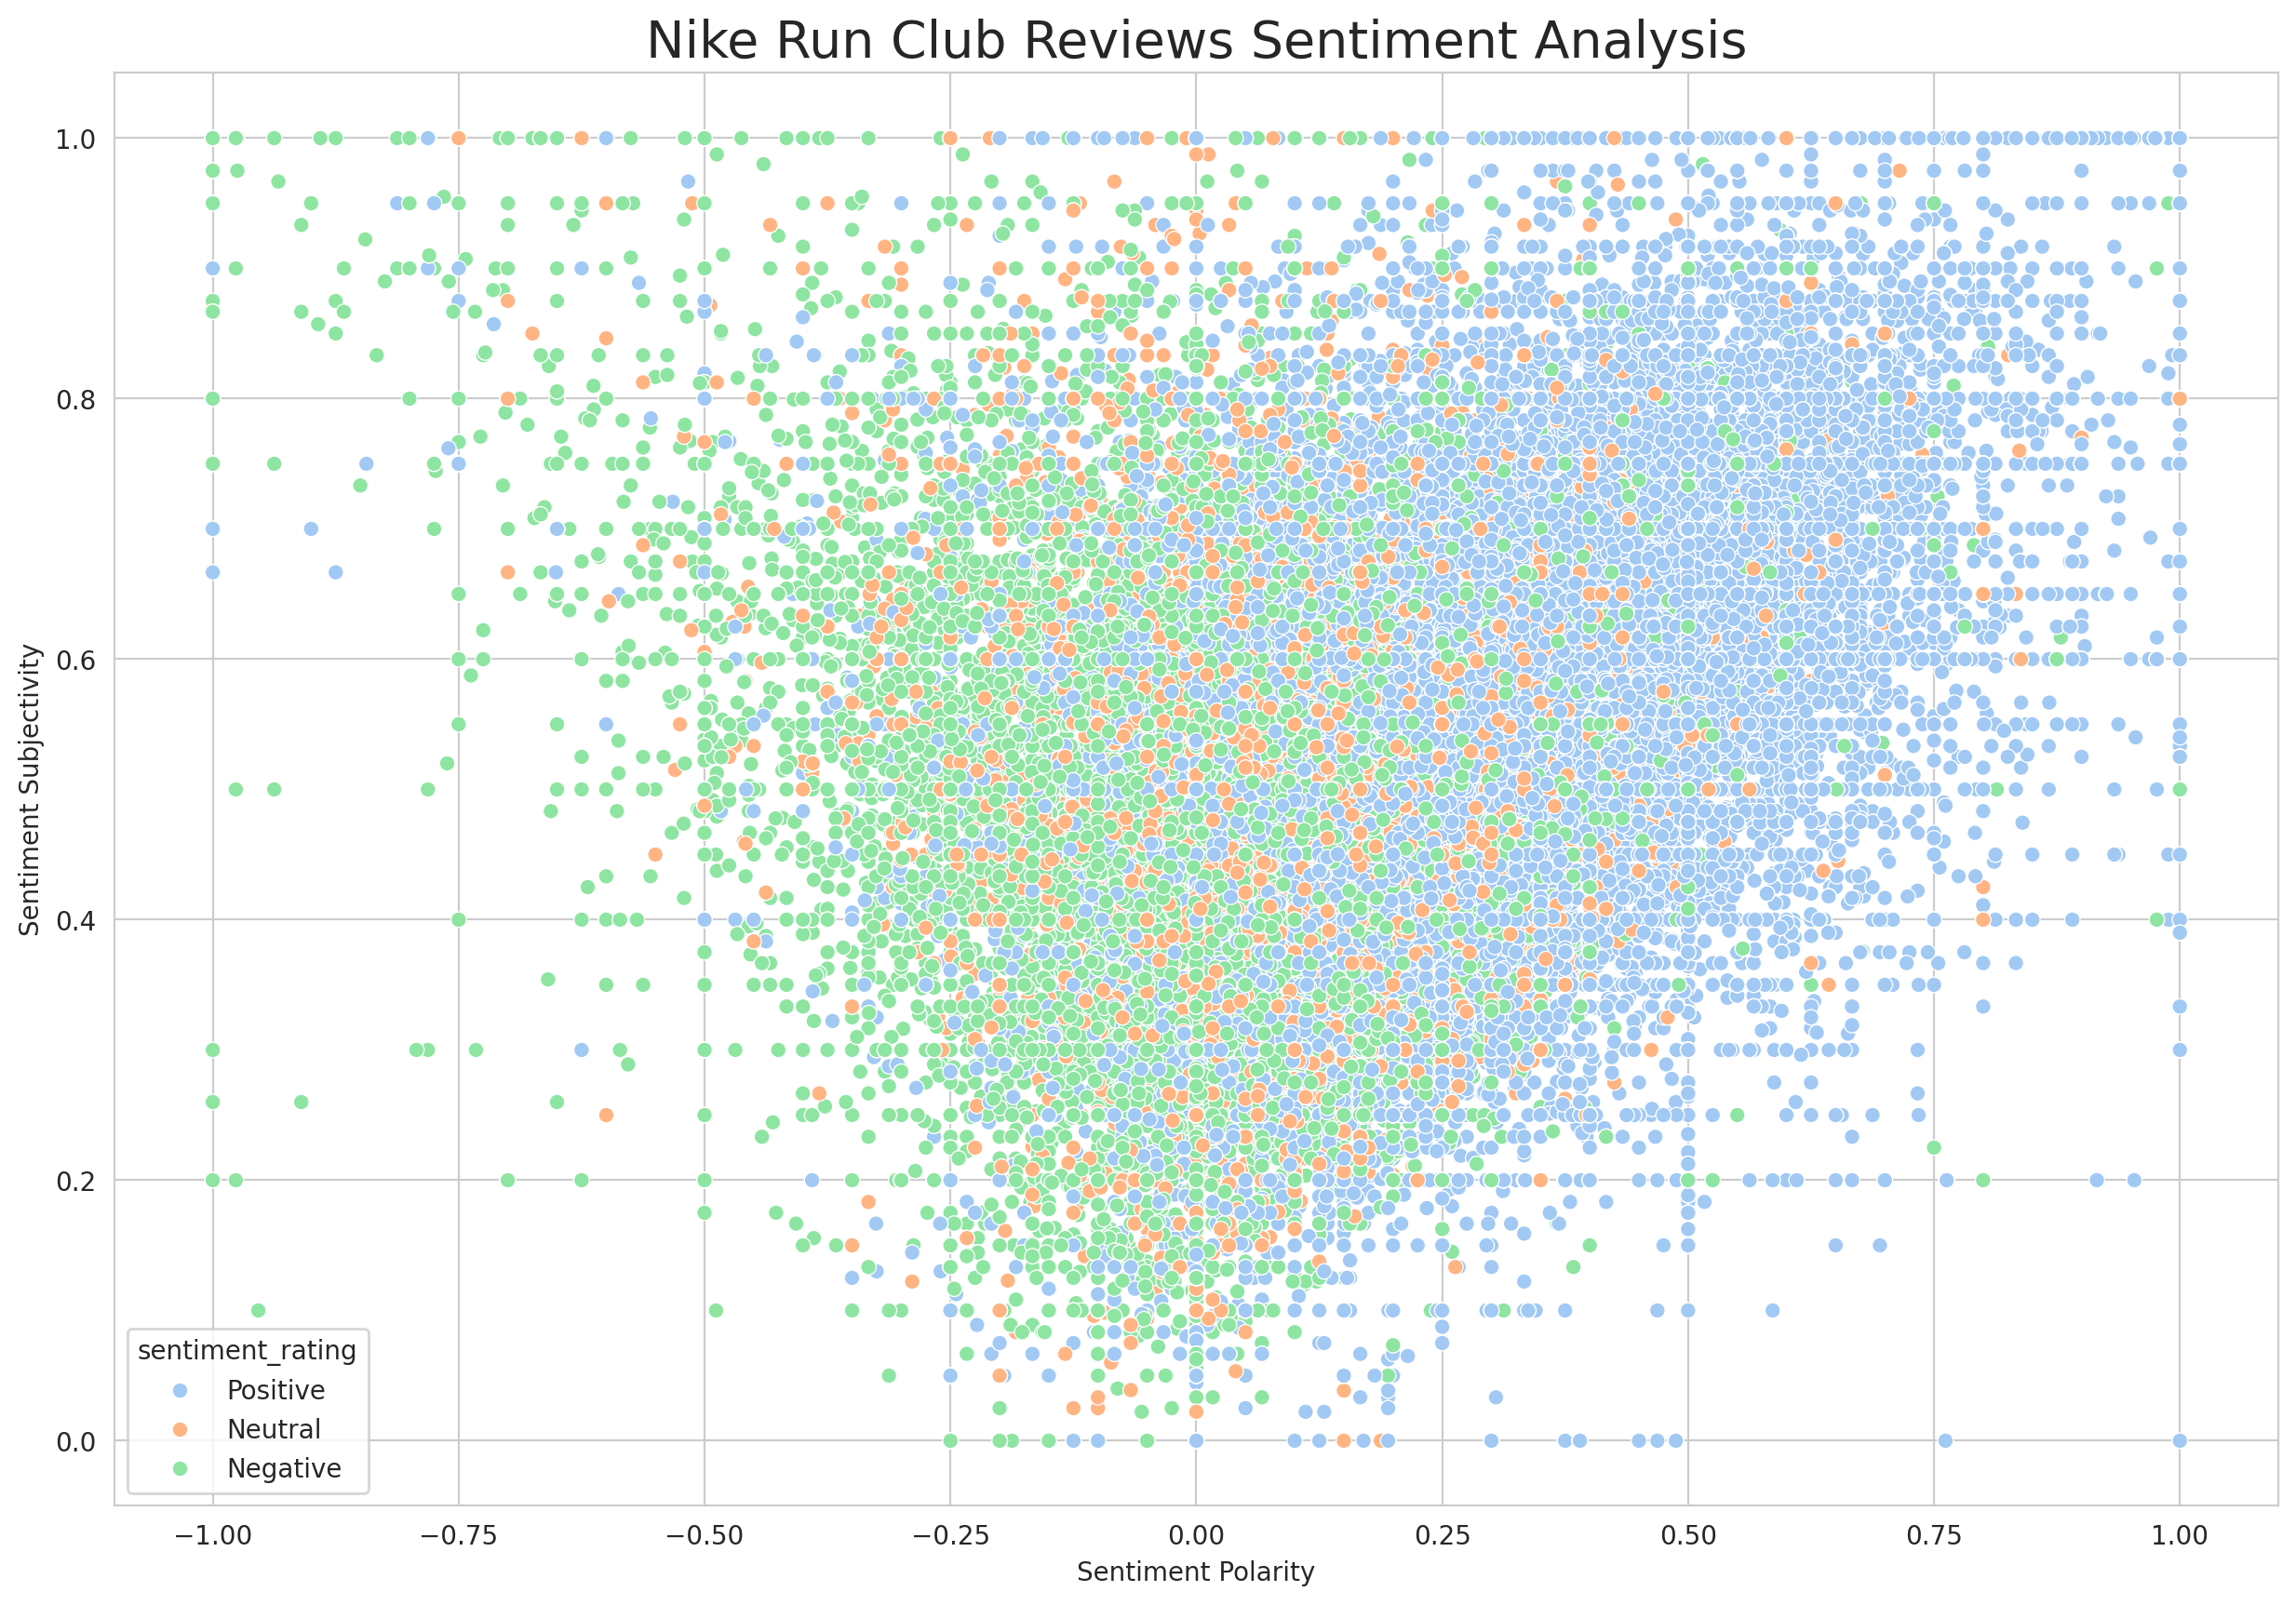

In [290]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat kolom sentiment polarity dan subjectivity berdasarkan review (content)
df_nike_reviews['sentiment_polarity'] = df_nike_reviews['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_nike_reviews['sentiment_subjectivity'] = df_nike_reviews['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Menambahkan kolom sentiment rating berdasarkan score review
df_nike_reviews['sentiment_rating'] = df_nike_reviews['score'].apply(
    lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative')
)

# Visualisasi Scatter Plot Sentiment Analysis
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df_nike_reviews['sentiment_polarity'], y=df_nike_reviews['sentiment_subjectivity'],
                hue=df_nike_reviews['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Nike Run Club Reviews Sentiment Analysis", fontsize=20)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Sentiment Subjectivity")
plt.grid(True)
plt.show()


# Preprocessing Data

Sebelum menganalisis lebih lanjut, kita harus memahami tipe dan informasi lainnya terkait data yang telah kita miliki.

Dengan menggunakan fungsi info, dapat dilihat bahwa kolom "reviewCreatedVersion", "replyContent", "repliedAt", dan "appVersion" memiliki nilai null.

Selanjutnya kita ingin melihat semua nilai unik dalam kolom 'reviewCreatedVersion' untuk mengetahui versi apa saja yang tersedia pada review app Nike Run Club yang telah kita ambil.

In [291]:
# Melihat semua nilai unik dalam kolom 'reviewCreatedVersion'
unique_versions = df_nike_reviews.reviewCreatedVersion.unique()
print("Versi Aplikasi yang Unik dalam Review:")
print(unique_versions)

# Menampilkan jumlah versi aplikasi yang unik dalam review
num_unique_versions = df_nike_reviews.reviewCreatedVersion.nunique()
print(f"\nJumlah versi aplikasi dalam review yang diambil adalah: {num_unique_versions}")


Versi Aplikasi yang Unik dalam Review:
['4.64.0' '2.9.0' '4.63.1' nan '4.42.0' '2.6.0' '1.3.0' '4.36.1' '4.38.0'
 '2.8.0' '4.26.0' '4.6.0' '1.2.2' '2.2.0' '4.62.0' '1.4' '4.17.0' '1.2.1'
 '4.40.0' '4.41.0' '4.37.0' '4.16.0' '4.13.0' '4.39.0' '4.24.0' '4.19.1'
 '1.1.0' '4.22.0' '4.30.0' '4.32.0' '4.33.0' '4.28.0' '4.35.0' '2.0.1'
 '2.7.0' '4.15.1' '4.12.1' '2.5.0' '2.4.0' '2.3.0' '2.0.3' '3.13.2'
 '3.2.0' '4.5.1' '4.31.0' '4.2.2' '4.21.0' '4.34.0' '4.36.0' '3.3.0'
 '4.18.0' '4.14.0' '4.29.0' '2.1.0' '3.5.1' '4.7.1' '4.25.0' '4.10.0'
 '3.0.2' '1.7.9' '4.15.2' '3.15.0' '4.20.0' '2.14.1' '3.11.1' '2.25.0'
 '4.27.0' '3.8.1' '4.4.1' '4.23.0' '1.3.4' '1.0.3' '2.15.2' '3.6.0'
 '3.7.1' '2.19.1' '4.11.0' '3.1.0' '4.9.7' '1.7' '4.8.0' '4.4.0' '2.13.2'
 '1.3.2' '2.7.1' '2.11.2' '4.15.0' '4.19.0' '2.20.2' '3.12.0' '3.14.0'
 '3.10.1' '2.24.1' '2.10.1' '2.21.1' '2.18.4' '3.0.0' '3.8.0' '2.20.1'
 '2.0.5' '3.13.1' '3.4.0' '2.26.0' '2.22.2' '2.18.2' '3.9.1' '4.7.0'
 '3.5.0' '2.8.1' '2.16.0' '2.17.0' '2.

## Menghapus Emoji dan Spesial Karakter

In [292]:
import re
import string

# Fungsi untuk menghapus emoji dan membersihkan teks
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese characters
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    if not isinstance(text, str):
        return ""  # Jika bukan string, return kosong

    # Hapus emoji dulu
    text = remove_emojis(text)

    # Menambah spasi setelah koma jika tidak ada
    text = re.sub(r",(?!\s)", ", ", text)

    # Menghapus karakter non-ASCII
    text = text.encode('ascii', 'replace').decode('ascii')

    # Menghapus URL
    text = re.sub(r"(?i)(?:https?:\/\/)?(?:www\.)?(?:[a-zA-Z0-9-.]+)(?:\.[a-zA-Z]{2,6})(?:\/[^\s\r\n]*)?", "", text)

    # Menghapus whitespace di depan/belakang teks dan spasi ganda
    text = text.strip()
    text = re.sub('\s+', ' ', text)

    # Menghapus tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))

    return text

# Terapkan fungsi pembersihan ke kolom review
df_nike_reviews['content'] = df_nike_reviews['content'].apply(clean_text)

# Tampilkan hasil
print(df_nike_reviews[['content']].head())

                                             content
0                                      The Best ever
1  Great app that encourages you to push yourself...
2  since March 15th the app couldnt synced to Gar...
3            Fantastic app using for last five years
4  I am trying to sign in from 2 month it is not ...


In [293]:
df_nike_reviews

content  score  \
0                                           The Best ever      5   
1       Great app that encourages you to push yourself...      5   
2       since March 15th the app couldnt synced to Gar...      3   
3                 Fantastic app using for last five years      5   
4       I am trying to sign in from 2 month it is not ...      1   
...                                                   ...    ...   
126475  Im really excited that this app has finally sh...      4   
126477    Great for anyone who starts running or training      5   
126478  This is soooo much better then the Iphone app ...      5   
126479  Just completed my first run with this new app ...      5   
126481  I have been waiting a long time for Nike to co...      5   

        thumbsUpCount reviewCreatedVersion                   at appVersion  \
0                   0               4.64.0  2025-03-19 03:54:34     4.64.0   
1                   0               4.64.0  2025-03-19 02:43:41     4.64.0   
2                   0               4.64.0  2025-03-19 02:01:27     4.64.0   
3                   0               4.64.0  2025-03-19 01:45:27     4.64.0   
4                   0               4.64.0  2025-03-19 01:03:35     4.64.0   
...               ...                  ...                  ...        ...   
126475              2                1.0.0  2012-06-21 23:37:49      1.0.0   
126477              0                  NaN  2012-06-21 23:31:12        NaN   
126478              1                  NaN  2012-06-21 23:16:50        NaN   
126479              6                1.0.0  2012-06-21 23:11:38      1.0.0   
126481              2                  NaN  2012-06-21 18:18:07        NaN   

            id  sentiment_polarity  sentiment_subjectivity sentiment_rating  
0            1            1.000000                0.300000         Positive  
1            2            0.650000                0.625000         Positive  
2            3            0.000000                0.000000          Neutral  
3            4            0.200000                0.483333         Positive  
4            5            0.600000                0.900000         Negative  
...        ...                 ...                     ...              ...  
126475  126476            0.171429                0.633333         Positive  
126477  126478            1.000000                0.750000         Positive  
126478  126479            0.668333                0.720000         Positive  
126479  126480            0.397273                0.579004         Positive  
126481  126482            0.233333                0.366667         Positive  

[103752 rows x 10 columns]

## Menghapus Review yang Kosong

Menghapus emoji dan karakter spesial memungkinkan beberapa review menjadi kosong, sehingga kita harus mengecek dan menghapusnya bila ada.

In [294]:
# Menghapus review yang bernilai kosong
df_nike_reviews = df_nike_reviews[df_nike_reviews['content'] != '']

In [295]:
# Memeriksa apakah masih ada review kosong pada kolom 'content'
df_nike_reviews[df_nike_reviews['content'] == '']

Empty DataFrame
Columns: [content, score, thumbsUpCount, reviewCreatedVersion, at, appVersion, id, sentiment_polarity, sentiment_subjectivity, sentiment_rating]
Index: []

In [296]:
# Menampilkan jumlah data setelah preprocessing
df_nike_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103747 entries, 0 to 126481
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   content                 103747 non-null  object 
 1   score                   103747 non-null  int64  
 2   thumbsUpCount           103747 non-null  int64  
 3   reviewCreatedVersion    96181 non-null   object 
 4   at                      103747 non-null  object 
 5   appVersion              96181 non-null   object 
 6   id                      103747 non-null  int64  
 7   sentiment_polarity      103747 non-null  float64
 8   sentiment_subjectivity  103747 non-null  float64
 9   sentiment_rating        103747 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 8.7+ MB


## Lowercasing Reviews

Membuat seluruh teks pada kolom 'content' menjadi huruf kecil menjadi hal yang penting agar teks menjadi konsisten dan homogen. Hal ini juga bertujuan untuk meningkatkan akurasi dari setiap teks.

In [297]:
# Mengubah tipe data kolom 'content' menjadi string
df_nike_reviews.loc[:, 'content'] = df_nike_reviews['content'].astype(str)

In [298]:
# Mengubah semua teks di kolom 'content' menjadi huruf kecil
df_nike_reviews.loc[:, 'content'] = df_nike_reviews['content'].apply(lambda x: x.lower())

In [299]:
# Menampilkan hasil
df_nike_reviews

content  score  \
0                                           the best ever      5   
1       great app that encourages you to push yourself...      5   
2       since march 15th the app couldnt synced to gar...      3   
3                 fantastic app using for last five years      5   
4       i am trying to sign in from 2 month it is not ...      1   
...                                                   ...    ...   
126475  im really excited that this app has finally sh...      4   
126477    great for anyone who starts running or training      5   
126478  this is soooo much better then the iphone app ...      5   
126479  just completed my first run with this new app ...      5   
126481  i have been waiting a long time for nike to co...      5   

        thumbsUpCount reviewCreatedVersion                   at appVersion  \
0                   0               4.64.0  2025-03-19 03:54:34     4.64.0   
1                   0               4.64.0  2025-03-19 02:43:41     4.64.0   
2                   0               4.64.0  2025-03-19 02:01:27     4.64.0   
3                   0               4.64.0  2025-03-19 01:45:27     4.64.0   
4                   0               4.64.0  2025-03-19 01:03:35     4.64.0   
...               ...                  ...                  ...        ...   
126475              2                1.0.0  2012-06-21 23:37:49      1.0.0   
126477              0                  NaN  2012-06-21 23:31:12        NaN   
126478              1                  NaN  2012-06-21 23:16:50        NaN   
126479              6                1.0.0  2012-06-21 23:11:38      1.0.0   
126481              2                  NaN  2012-06-21 18:18:07        NaN   

            id  sentiment_polarity  sentiment_subjectivity sentiment_rating  
0            1            1.000000                0.300000         Positive  
1            2            0.650000                0.625000         Positive  
2            3            0.000000                0.000000          Neutral  
3            4            0.200000                0.483333         Positive  
4            5            0.600000                0.900000         Negative  
...        ...                 ...                     ...              ...  
126475  126476            0.171429                0.633333         Positive  
126477  126478            1.000000                0.750000         Positive  
126478  126479            0.668333                0.720000         Positive  
126479  126480            0.397273                0.579004         Positive  
126481  126482            0.233333                0.366667         Positive  

[103747 rows x 10 columns]

## Expand Contraxtions

Mengubah bentuk singkatan menjadi bentuk panjang agar teks lebih mudah diproses dan dianalisis dengan benar. Misalnya, kata "can't" akan diubah menjadi "cannot", dan "it's" menjadi "it is".

In [300]:
!pip install spacy
!pip install contractions
import spacy
import contractions

In [301]:
# Expand contractions untuk dataset Nike Run Club
def expand_contractions(text):
    return contractions.fix(text)  # Contoh: "can't" → "cannot"

# Terapkan pada kolom 'content'
df_nike_reviews['content'] = df_nike_reviews['content'].apply(expand_contractions)

# Tampilkan hasil contoh
df_nike_reviews[['content']].head()

<ipython-input-301-6b0f1df13291>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike_reviews['content'] = df_nike_reviews['content'].apply(expand_contractions)


content
0                                      the best ever
1  great app that encourages you to push yourself...
2  since march 15th the app could not synced to g...
3            fantastic app using for last five years
4  i am trying to sign in from 2 month it is not ...

## Spell Corection

In [302]:
!pip install symspellpy


In [303]:
from symspellpy import SymSpell, Verbosity  # Perbaikan di sini
import pkg_resources
import nltk
import re
from nltk.tokenize import word_tokenize

# Setup SymSpell
nltk.download('punkt')

# Load dictionary paths
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")

# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

def enhanced_correct_spelling(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    corrected_words = []

    for word in words:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)  # Perbaikan di sini
        corrected_words.append(suggestions[0].term if suggestions else word)

    corrected_text = " ".join(corrected_words)
    suggestions = sym_spell.lookup_compound(corrected_text, max_edit_distance=2)

    return suggestions[0].term if suggestions else corrected_text

# Terapkan spell correction ke dataframe
df_nike_reviews['spell_corrected_content'] = df_nike_reviews['content'].apply(enhanced_correct_spelling)

df_nike_reviews


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-303-095f0855989f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike_reviews['spell_corrected_content'] = df_nike_reviews['content'].apply(enhanced_correct_spelling)


content  score  \
0                                           the best ever      5   
1       great app that encourages you to push yourself...      5   
2       since march 15th the app could not synced to g...      3   
3                 fantastic app using for last five years      5   
4       i am trying to sign in from 2 month it is not ...      1   
...                                                   ...    ...   
126475  i am really excited that this app has finally ...      4   
126477    great for anyone who starts running or training      5   
126478  this is soooo much better then the iphone app ...      5   
126479  just completed my first run with this new app ...      5   
126481  i have been waiting a long time for nike to co...      5   

        thumbsUpCount reviewCreatedVersion                   at appVersion  \
0                   0               4.64.0  2025-03-19 03:54:34     4.64.0   
1                   0               4.64.0  2025-03-19 02:43:41     4.64.0   
2                   0               4.64.0  2025-03-19 02:01:27     4.64.0   
3                   0               4.64.0  2025-03-19 01:45:27     4.64.0   
4                   0               4.64.0  2025-03-19 01:03:35     4.64.0   
...               ...                  ...                  ...        ...   
126475              2                1.0.0  2012-06-21 23:37:49      1.0.0   
126477              0                  NaN  2012-06-21 23:31:12        NaN   
126478              1                  NaN  2012-06-21 23:16:50        NaN   
126479              6                1.0.0  2012-06-21 23:11:38      1.0.0   
126481              2                  NaN  2012-06-21 18:18:07        NaN   

            id  sentiment_polarity  sentiment_subjectivity sentiment_rating  \
0            1            1.000000                0.300000         Positive   
1            2            0.650000                0.625000         Positive   
2            3            0.000000                0.000000          Neutral   
3            4            0.200000                0.483333         Positive   
4            5            0.600000                0.900000         Negative   
...        ...                 ...                     ...              ...   
126475  126476            0.171429                0.633333         Positive   
126477  126478            1.000000                0.750000         Positive   
126478  126479            0.668333                0.720000         Positive   
126479  126480            0.397273                0.579004         Positive   
126481  126482            0.233333                0.366667         Positive   

                                  spell_corrected_content  
0                                           the best ever  
1       great app that encourages you to push yourself...  
2       since march the the app could not synced to ga...  
3                 fantastic app using for last five years  
4       i am trying to sign in from month it is not pr...  
...                                                   ...  
126475  i am really excited that this app has finally ...  
126477    great for anyone who starts running or training  
126478  this is soon much better then the iphone app g...  
126479  just completed my first run with this new app ...  
126481  i have been waiting a long time for nike to co...  

[103747 rows x 11 columns]

In [336]:
import re

def handle_negation(text):
    # Gabungkan kata negatif dengan kata sifat atau kata kerja
    negation_patterns = r'\b(?:not|no|never|none|n\'t)\s+(\w+)'
    text = re.sub(negation_patterns, lambda match: match.group(0).replace(" ", "_"), text)
    return text
# Terapkan handle_negation lebih awal
df_nike_reviews['final_cleaned'] = df_nike_reviews['final_cleaned'].apply(handle_negation)

<ipython-input-336-8cba9321cf29>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike_reviews['final_cleaned'] = df_nike_reviews['final_cleaned'].apply(handle_negation)


## Punctuation Removal

In [337]:
import string

def remove_punctuation(text):
    """Menghapus tanda baca dari teks."""
    return text.translate(str.maketrans("", "", string.punctuation))

# Terapkan pada kolom 'spell_corrected_content' setelah spell correction
df_nike_reviews['spell_corrected_content'] = df_nike_reviews['spell_corrected_content'].apply(remove_punctuation)

# Tampilkan hasil
df_nike_reviews[['spell_corrected_content']].head()


<ipython-input-337-e813b643c2ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike_reviews['spell_corrected_content'] = df_nike_reviews['spell_corrected_content'].apply(remove_punctuation)


spell_corrected_content
0                                      the best ever
1  great app that encourages you to push yourself...
2  since march the the app could not synced to ga...
3            fantastic app using for last five years
4  i am trying to sign in from month it is not pr...

## Tokenization

In [338]:
!pip install nltk

In [339]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt' resource jika belum ada
nltk.download('punkt')

# Tokenize pada kolom 'spell_corrected_content' setelah punctuation removal
df_nike_reviews['token'] = df_nike_reviews['spell_corrected_content'].apply(word_tokenize)

# Tampilkan hasil
df_nike_reviews[['spell_corrected_content', 'token']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-339-234ba1244009>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike_reviews['token'] = df_nike_reviews['spell_corrected_content'].apply(word_tokenize)


spell_corrected_content  \
0                                      the best ever   
1  great app that encourages you to push yourself...   
2  since march the the app could not synced to ga...   
3            fantastic app using for last five years   
4  i am trying to sign in from month it is not pr...   

                                               token  
0                                  [the, best, ever]  
1  [great, app, that, encourages, you, to, push, ...  
2  [since, march, the, the, app, could, not, sync...  
3    [fantastic, app, using, for, last, five, years]  
4  [i, am, trying, to, sign, in, from, month, it,...

In [340]:
# Display results
print(df_nike_reviews[['spell_corrected_content', 'token']])

                                  spell_corrected_content  \
0                                           the best ever   
1       great app that encourages you to push yourself...   
2       since march the the app could not synced to ga...   
3                 fantastic app using for last five years   
4       i am trying to sign in from month it is not pr...   
...                                                   ...   
126475  i am really excited that this app has finally ...   
126477    great for anyone who starts running or training   
126478  this is soon much better then the iphone app g...   
126479  just completed my first run with this new app ...   
126481  i have been waiting a long time for nike to co...   

                                                    token  
0                                       [the, best, ever]  
1       [great, app, that, encourages, you, to, push, ...  
2       [since, march, the, the, app, could, not, sync...  
3         [fantastic, app, 

In [341]:
df_nike_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103747 entries, 0 to 126481
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   content                  103747 non-null  object 
 1   score                    103747 non-null  int64  
 2   thumbsUpCount            103747 non-null  int64  
 3   reviewCreatedVersion     96181 non-null   object 
 4   at                       103747 non-null  object 
 5   appVersion               96181 non-null   object 
 6   id                       103747 non-null  int64  
 7   sentiment_polarity       103747 non-null  float64
 8   sentiment_subjectivity   103747 non-null  float64
 9   sentiment_rating         103747 non-null  object 
 10  spell_corrected_content  103747 non-null  object 
 11  token                    103747 non-null  object 
 12  token_after_sr           103747 non-null  object 
 13  lemmatized_tokens        103747 non-null  object 
 14  final_cle

## Stopwords Removal

In [342]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Ambil stopwords bahasa Inggris dari NLTK
english_stopwords = set(stopwords.words('english'))

# Kata negatif utama yang tidak boleh dihapus
negation_words = {'not', 'no', 'never', "n't", 'none'}

# Hilangkan kata negatif dari stopwords
english_stopwords = english_stopwords.difference(negation_words)

# Tambahkan stopwords tambahan jika diperlukan (termasuk kata positif umum)
additional_stopwords = {
    'nike', 'shoes', 'shoe', 'sneakers', 'sneaker', 'app', 'product', 'pair',
    'run', 'runs', 'running', 'use', 'using', 'get', 'keeps', 'time', 'track',
    'tracking', 'like', 'would', 'update', 'keep', 'used', 'one', 'please',
    'even', 'distance', 'gps', 'work', 'works', 'training', 'also', 'fix', 'back',
    'could', 'miles', 'every', 'lot', 'thing', 'stuff', 'many', 'always',
    'never', 'ever', 'seems', 'actually', 'really', 'much', 'still'
}

# Update stopwords final tanpa menghapus kata negatif
english_stopwords.update(additional_stopwords)

# Stopwords removal setelah negation handling
def stopwords_removal(tokens):
    cleaned_tokens = []
    for word in tokens:
        if word.lower() not in english_stopwords and word.isalpha():
            # Pertahankan kata negatif yang digabung dengan kata positif
            if '_' in word and any(neg in word for neg in negation_words):
                cleaned_tokens.append(word)
            elif word.lower() not in english_stopwords:
                cleaned_tokens.append(word)
    return cleaned_tokens

df_nike_reviews['token_after_sr'] = df_nike_reviews['token'].apply(stopwords_removal)

# Cek hasilnya
print(df_nike_reviews[['token', 'token_after_sr']].head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                token  \
0                                   [the, best, ever]   
1   [great, app, that, encourages, you, to, push, ...   
2   [since, march, the, the, app, could, not, sync...   
3     [fantastic, app, using, for, last, five, years]   
4   [i, am, trying, to, sign, in, from, month, it,...   
5   [great, and, fun, coaching, very, beginner, fr...   
6   [i, am, years, young, and, in, decent, i, have...   
7                                   [great, coaching]   
9   [i, was, satisfied, for, a, long, time, but, a...   
11  [arc, has, helped, me, get, into, running, whe...   

                                       token_after_sr  
0                                              [best]  
1                 [great, encourages, push, bit, day]  
2         [since, march, not, synced, gamin, connect]  
3                      [fantastic, last, five, years]  
4   [trying, sign, month, not, proceeding, kind, b...  
5   [great, fun, coaching, beginner,

<ipython-input-342-cf1101535d16>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike_reviews['token_after_sr'] = df_nike_reviews['token'].apply(stopwords_removal)


In [343]:
from collections import Counter
import matplotlib.pyplot as plt

def freq_words(tokens_column, top_n=20):
    all_words = [word for tokens in tokens_column for word in tokens]
    word_freq = Counter(all_words).most_common(top_n)

    words, counts = zip(*word_freq)

    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top Frequent Words")
    plt.show()


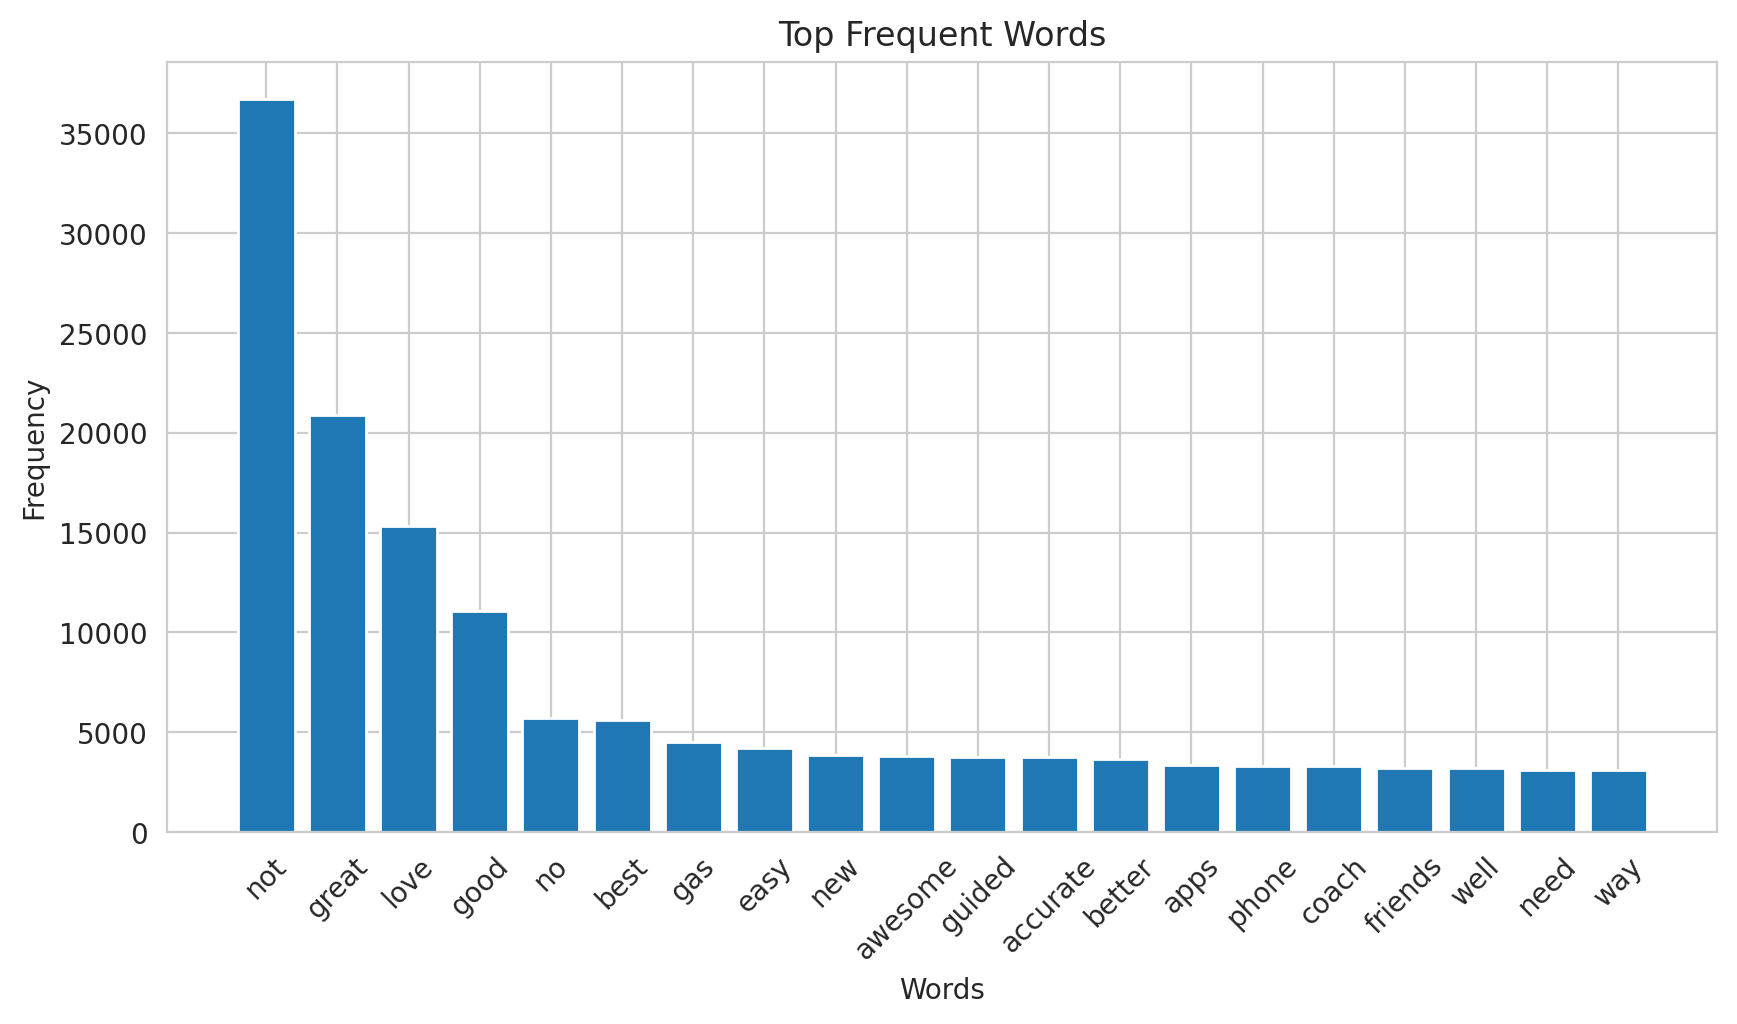

In [344]:
freq_words(df_nike_reviews['token_after_sr'])


## Lemmatization

In [345]:
df_nike_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103747 entries, 0 to 126481
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   content                  103747 non-null  object 
 1   score                    103747 non-null  int64  
 2   thumbsUpCount            103747 non-null  int64  
 3   reviewCreatedVersion     96181 non-null   object 
 4   at                       103747 non-null  object 
 5   appVersion               96181 non-null   object 
 6   id                       103747 non-null  int64  
 7   sentiment_polarity       103747 non-null  float64
 8   sentiment_subjectivity   103747 non-null  float64
 9   sentiment_rating         103747 non-null  object 
 10  spell_corrected_content  103747 non-null  object 
 11  token                    103747 non-null  object 
 12  token_after_sr           103747 non-null  object 
 13  lemmatized_tokens        103747 non-null  object 
 14  final_cle

In [346]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Tambahkan resource untuk lemmatization yang lebih akurat
from nltk.stem import WordNetLemmatizer

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk lemmatization pada tokens
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Lakukan lemmatization pada kolom token_after_sr yang sudah dibersihkan dari stopwords
df_nike_reviews['lemmatized_tokens'] = df_nike_reviews['token_after_sr'].apply(lemmatize_text)

# Tampilkan hasil untuk melihat perubahan
display(df_nike_reviews[['spell_corrected_content', 'token_after_sr', 'lemmatized_tokens']])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-346-fc2c6ddb5f22>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike_reviews['lemmatized_tokens'] = df_nike_reviews['token_after_sr'].apply(lemmatize_text)


spell_corrected_content  \
0                                           the best ever   
1       great app that encourages you to push yourself...   
2       since march the the app could not synced to ga...   
3                 fantastic app using for last five years   
4       i am trying to sign in from month it is not pr...   
...                                                   ...   
126475  i am really excited that this app has finally ...   
126477    great for anyone who starts running or training   
126478  this is soon much better then the iphone app g...   
126479  just completed my first run with this new app ...   
126481  i have been waiting a long time for nike to co...   

                                           token_after_sr  \
0                                                  [best]   
1                     [great, encourages, push, bit, day]   
2             [since, march, not, synced, gamin, connect]   
3                          [fantastic, last, five, years]   
4       [trying, sign, month, not, proceeding, kind, b...   
...                                                   ...   
126475  [excited, finally, shown, android, far, looks,...   
126477                            [great, anyone, starts]   
126478  [soon, better, iphone, good, job, great, see, ...   
126479  [completed, first, new, worked, great, nice, i...   
126481  [waiting, long, come, android, better, imagine...   

                                        lemmatized_tokens  
0                                                  [best]  
1                     [great, encourages, push, bit, day]  
2             [since, march, not, synced, gamin, connect]  
3                           [fantastic, last, five, year]  
4       [trying, sign, month, not, proceeding, kind, b...  
...                                                   ...  
126475  [excited, finally, shown, android, far, look, ...  
126477                             [great, anyone, start]  
126478  [soon, better, iphone, good, job, great, see, ...  
126479  [completed, first, new, worked, great, nice, i...  
126481  [waiting, long, come, android, better, imagine...  

[103747 rows x 3 columns]

In [347]:
df_nike_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103747 entries, 0 to 126481
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   content                  103747 non-null  object 
 1   score                    103747 non-null  int64  
 2   thumbsUpCount            103747 non-null  int64  
 3   reviewCreatedVersion     96181 non-null   object 
 4   at                       103747 non-null  object 
 5   appVersion               96181 non-null   object 
 6   id                       103747 non-null  int64  
 7   sentiment_polarity       103747 non-null  float64
 8   sentiment_subjectivity   103747 non-null  float64
 9   sentiment_rating         103747 non-null  object 
 10  spell_corrected_content  103747 non-null  object 
 11  token                    103747 non-null  object 
 12  token_after_sr           103747 non-null  object 
 13  lemmatized_tokens        103747 non-null  object 
 14  final_cle

# Sentiment Analysis after Text Preprocessing

In [348]:
# Gabungkan kembali token setelah lemmatization menjadi kalimat utuh
df_nike_reviews['final_cleaned'] = df_nike_reviews['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

# Cek hasil
display(df_nike_reviews[['lemmatized_tokens', 'final_cleaned']])


<ipython-input-348-57cc3f4c4a85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike_reviews['final_cleaned'] = df_nike_reviews['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))


lemmatized_tokens  \
0                                                  [best]   
1                     [great, encourages, push, bit, day]   
2             [since, march, not, synced, gamin, connect]   
3                           [fantastic, last, five, year]   
4       [trying, sign, month, not, proceeding, kind, b...   
...                                                   ...   
126475  [excited, finally, shown, android, far, look, ...   
126477                             [great, anyone, start]   
126478  [soon, better, iphone, good, job, great, see, ...   
126479  [completed, first, new, worked, great, nice, i...   
126481  [waiting, long, come, android, better, imagine...   

                                            final_cleaned  
0                                                    best  
1                           great encourages push bit day  
2                    since march not synced gamin connect  
3                                fantastic last five year  
4       trying sign month not proceeding kind bug not ...  
...                                                   ...  
126475  excited finally shown android far look great n...  
126477                                 great anyone start  
126478  soon better iphone good job great see create g...  
126479  completed first new worked great nice integrat...  
126481    waiting long come android better imagine thanks  

[103747 rows x 2 columns]

In [349]:
df_nike_reviews2 = df_nike_reviews.copy()

In [350]:
df_nike_reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103747 entries, 0 to 126481
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   content                  103747 non-null  object 
 1   score                    103747 non-null  int64  
 2   thumbsUpCount            103747 non-null  int64  
 3   reviewCreatedVersion     96181 non-null   object 
 4   at                       103747 non-null  object 
 5   appVersion               96181 non-null   object 
 6   id                       103747 non-null  int64  
 7   sentiment_polarity       103747 non-null  float64
 8   sentiment_subjectivity   103747 non-null  float64
 9   sentiment_rating         103747 non-null  object 
 10  spell_corrected_content  103747 non-null  object 
 11  token                    103747 non-null  object 
 12  token_after_sr           103747 non-null  object 
 13  lemmatized_tokens        103747 non-null  object 
 14  final_cle

In [351]:
df_nike_reviews2.drop(columns=['sentiment_polarity', 'sentiment_subjectivity'])

content  score  \
0                                           the best ever      5   
1       great app that encourages you to push yourself...      5   
2       since march 15th the app could not synced to g...      3   
3                 fantastic app using for last five years      5   
4       i am trying to sign in from 2 month it is not ...      1   
...                                                   ...    ...   
126475  i am really excited that this app has finally ...      4   
126477    great for anyone who starts running or training      5   
126478  this is soooo much better then the iphone app ...      5   
126479  just completed my first run with this new app ...      5   
126481  i have been waiting a long time for nike to co...      5   

        thumbsUpCount reviewCreatedVersion                   at appVersion  \
0                   0               4.64.0  2025-03-19 03:54:34     4.64.0   
1                   0               4.64.0  2025-03-19 02:43:41     4.64.0   
2                   0               4.64.0  2025-03-19 02:01:27     4.64.0   
3                   0               4.64.0  2025-03-19 01:45:27     4.64.0   
4                   0               4.64.0  2025-03-19 01:03:35     4.64.0   
...               ...                  ...                  ...        ...   
126475              2                1.0.0  2012-06-21 23:37:49      1.0.0   
126477              0                  NaN  2012-06-21 23:31:12        NaN   
126478              1                  NaN  2012-06-21 23:16:50        NaN   
126479              6                1.0.0  2012-06-21 23:11:38      1.0.0   
126481              2                  NaN  2012-06-21 18:18:07        NaN   

            id sentiment_rating  \
0            1         Positive   
1            2         Positive   
2            3          Neutral   
3            4         Positive   
4            5         Negative   
...        ...              ...   
126475  126476         Positive   
126477  126478         Positive   
126478  126479         Positive   
126479  126480         Positive   
126481  126482         Positive   

                                  spell_corrected_content  \
0                                           the best ever   
1       great app that encourages you to push yourself...   
2       since march the the app could not synced to ga...   
3                 fantastic app using for last five years   
4       i am trying to sign in from month it is not pr...   
...                                                   ...   
126475  i am really excited that this app has finally ...   
126477    great for anyone who starts running or training   
126478  this is soon much better then the iphone app g...   
126479  just completed my first run with this new app ...   
126481  i have been waiting a long time for nike to co...   

                                                    token  \
0                                       [the, best, ever]   
1       [great, app, that, encourages, you, to, push, ...   
2       [since, march, the, the, app, could, not, sync...   
3         [fantastic, app, using, for, last, five, years]   
4       [i, am, trying, to, sign, in, from, month, it,...   
...                                                   ...   
126475  [i, am, really, excited, that, this, app, has,...   
126477  [great, for, anyone, who, starts, running, or,...   
126478  [this, is, soon, much, better, then, the, ipho...   
126479  [just, completed, my, first, run, with, this, ...   
126481  [i, have, been, waiting, a, long, time, for, n...   

                                           token_after_sr  \
0                                                  [best]   
1                     [great, encourages, push, bit, day]   
2             [since, march, not, synced, gamin, connect]   
3                          [fantastic, last, five, years]   
4       [trying, sign, month, not, proceeding, kind, b...   
...                                        

In [352]:
df_nike_reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103747 entries, 0 to 126481
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   content                  103747 non-null  object 
 1   score                    103747 non-null  int64  
 2   thumbsUpCount            103747 non-null  int64  
 3   reviewCreatedVersion     96181 non-null   object 
 4   at                       103747 non-null  object 
 5   appVersion               96181 non-null   object 
 6   id                       103747 non-null  int64  
 7   sentiment_polarity       103747 non-null  float64
 8   sentiment_subjectivity   103747 non-null  float64
 9   sentiment_rating         103747 non-null  object 
 10  spell_corrected_content  103747 non-null  object 
 11  token                    103747 non-null  object 
 12  token_after_sr           103747 non-null  object 
 13  lemmatized_tokens        103747 non-null  object 
 14  final_cle

In [353]:
# Mengisi missing values pada kolom 'final_cleaned' dengan string kosong
df_nike_reviews2['final_cleaned'] = df_nike_reviews2['final_cleaned'].fillna('')

# Hitung sentiment polarity dan subjectivity dengan penamaan kolom yang konsisten
df_nike_reviews2['sentiment_polarity'] = df_nike_reviews2['final_cleaned'].apply(lambda x: TextBlob(x).polarity)
df_nike_reviews2['sentiment_subjectivity'] = df_nike_reviews2['final_cleaned'].apply(lambda x: TextBlob(x).subjectivity)


In [354]:
df_nike_reviews2

content  score  \
0                                           the best ever      5   
1       great app that encourages you to push yourself...      5   
2       since march 15th the app could not synced to g...      3   
3                 fantastic app using for last five years      5   
4       i am trying to sign in from 2 month it is not ...      1   
...                                                   ...    ...   
126475  i am really excited that this app has finally ...      4   
126477    great for anyone who starts running or training      5   
126478  this is soooo much better then the iphone app ...      5   
126479  just completed my first run with this new app ...      5   
126481  i have been waiting a long time for nike to co...      5   

        thumbsUpCount reviewCreatedVersion                   at appVersion  \
0                   0               4.64.0  2025-03-19 03:54:34     4.64.0   
1                   0               4.64.0  2025-03-19 02:43:41     4.64.0   
2                   0               4.64.0  2025-03-19 02:01:27     4.64.0   
3                   0               4.64.0  2025-03-19 01:45:27     4.64.0   
4                   0               4.64.0  2025-03-19 01:03:35     4.64.0   
...               ...                  ...                  ...        ...   
126475              2                1.0.0  2012-06-21 23:37:49      1.0.0   
126477              0                  NaN  2012-06-21 23:31:12        NaN   
126478              1                  NaN  2012-06-21 23:16:50        NaN   
126479              6                1.0.0  2012-06-21 23:11:38      1.0.0   
126481              2                  NaN  2012-06-21 18:18:07        NaN   

            id  sentiment_polarity  sentiment_subjectivity sentiment_rating  \
0            1            1.000000                0.300000         Positive   
1            2            0.800000                0.750000         Positive   
2            3            0.000000                0.000000          Neutral   
3            4            0.200000                0.483333         Positive   
4            5            0.600000                0.900000         Negative   
...        ...                 ...                     ...              ...   
126475  126476            0.222917                0.722222         Positive   
126477  126478            0.800000                0.750000         Positive   
126478  126479            0.626667                0.720000         Positive   
126479  126480            0.357273                0.579004         Positive   
126481  126482            0.216667                0.366667         Positive   

                                  spell_corrected_content  \
0                                           the best ever   
1       great app that encourages you to push yourself...   
2       since march the the app could not synced to ga...   
3                 fantastic app using for last five years   
4       i am trying to sign in from month it is not pr...   
...                                                   ...   
126475  i am really excited that this app has finally ...   
126477    great for anyone who starts running or training   
126478  this is soon much better then the iphone app g...   
126479  just completed my first run with this new app ...   
126481  i have been waiting a long time for nike to co...   

                                                    token  \
0                                       [the, best, ever]   
1       [great, app, that, encourages, you, to, push, ...   
2       [since, march, the, the, app, could, not, sync...   
3         [fantastic, app, using, for, last, five, years]   
4       [i, am, trying, to, sign, in, from, month, it,...   
...                                                   ...   
126475  [i, am, really, excited, that, this, app, has,...   
126477  [great, for, anyone, who, starts, running, or,...   
126478  [this, is, soon, much, better, then, the, ipho...   
1264

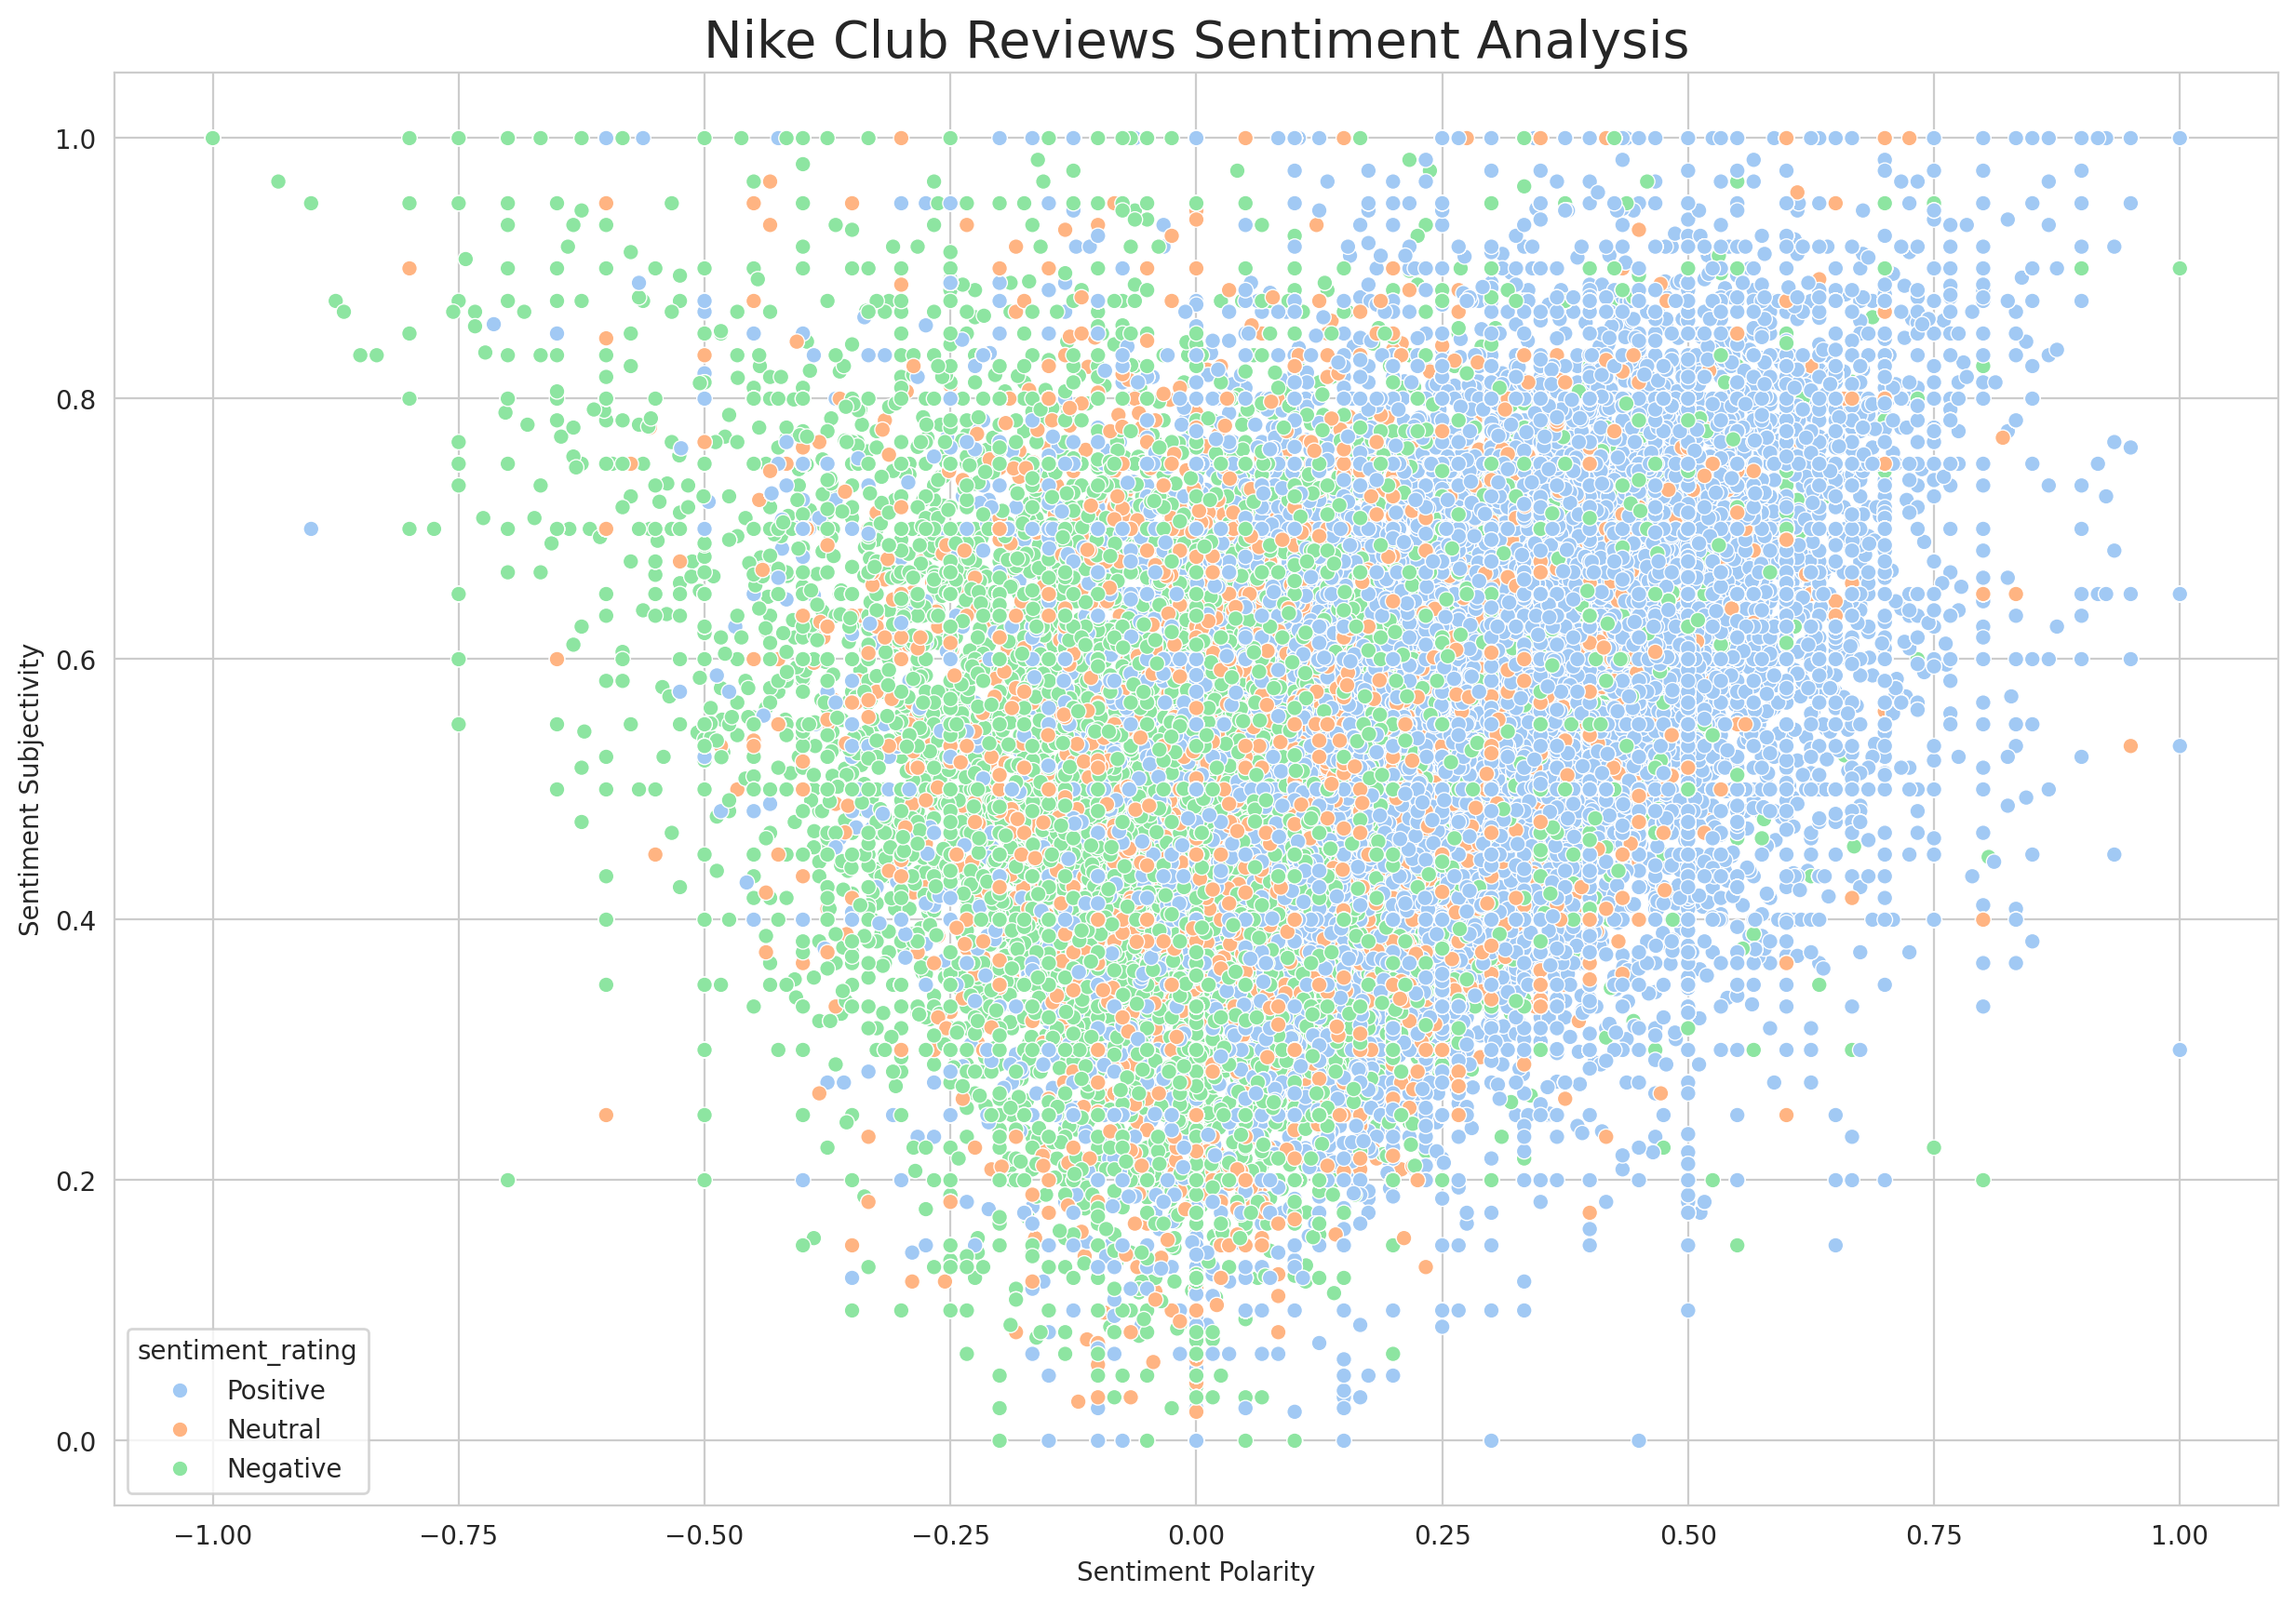

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.scatterplot(x=df_nike_reviews2['sentiment_polarity'],
                y=df_nike_reviews2['sentiment_subjectivity'],
                hue=df_nike_reviews2['sentiment_rating'],
                edgecolor='white',
                palette="pastel")
plt.title("Nike Club Reviews Sentiment Analysis", fontsize=20)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Sentiment Subjectivity")
plt.grid(True)
plt.show()


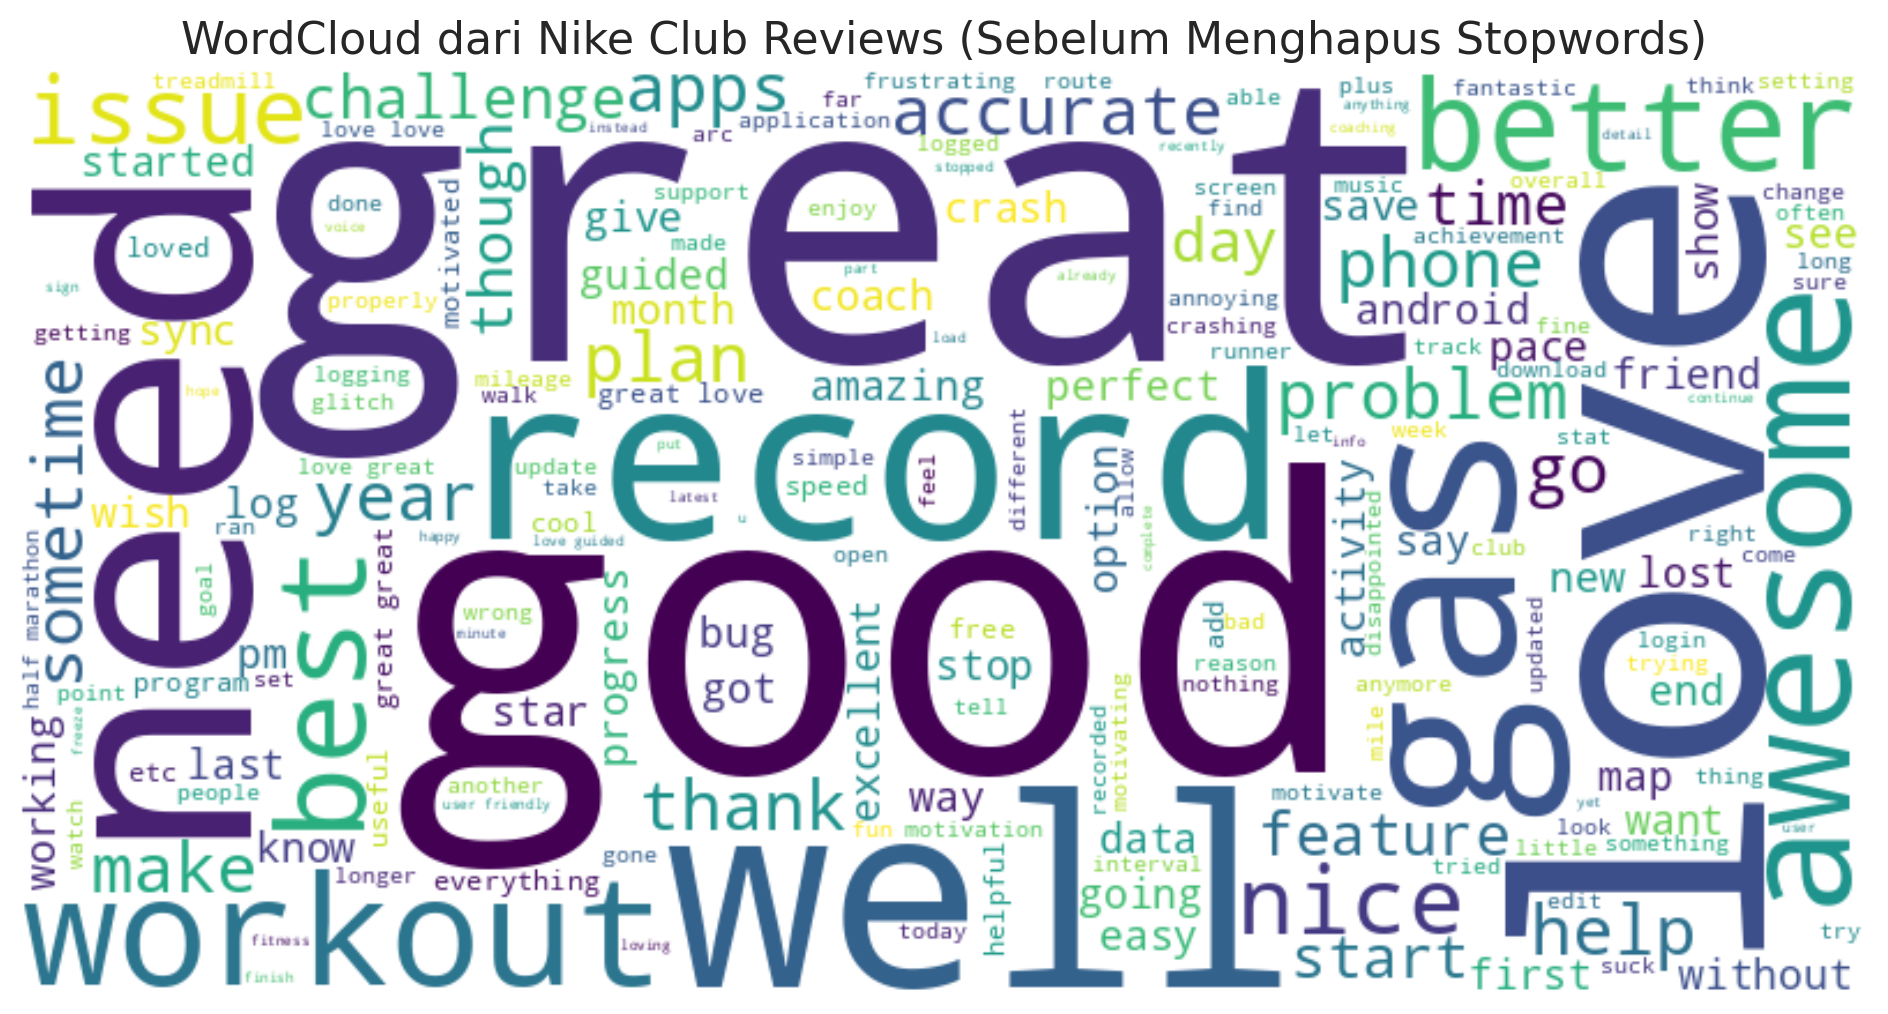

In [356]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat WordCloud langsung dari kolom 'final_cleaned'
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_nike_reviews['final_cleaned']))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari Nike Club Reviews (Sebelum Menghapus Stopwords)", fontsize=16)
plt.show()


# Extract To New CSV

In [357]:
# Simpan DataFrame df_nike_reviews2 ke CSV
df_nike_reviews2.to_csv('df_nike_reviews2.csv', index=False, encoding='utf-8')

print("Data berhasil disimpan ke 'df_nike_reviews2.csv' 🎉")

Data berhasil disimpan ke 'df_nike_reviews2.csv' 🎉


# Exploratory Data Analysis

In [358]:
df_nike_reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103747 entries, 0 to 126481
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   content                  103747 non-null  object 
 1   score                    103747 non-null  int64  
 2   thumbsUpCount            103747 non-null  int64  
 3   reviewCreatedVersion     96181 non-null   object 
 4   at                       103747 non-null  object 
 5   appVersion               96181 non-null   object 
 6   id                       103747 non-null  int64  
 7   sentiment_polarity       103747 non-null  float64
 8   sentiment_subjectivity   103747 non-null  float64
 9   sentiment_rating         103747 non-null  object 
 10  spell_corrected_content  103747 non-null  object 
 11  token                    103747 non-null  object 
 12  token_after_sr           103747 non-null  object 
 13  lemmatized_tokens        103747 non-null  object 
 14  final_cle

## Review Score Distribution

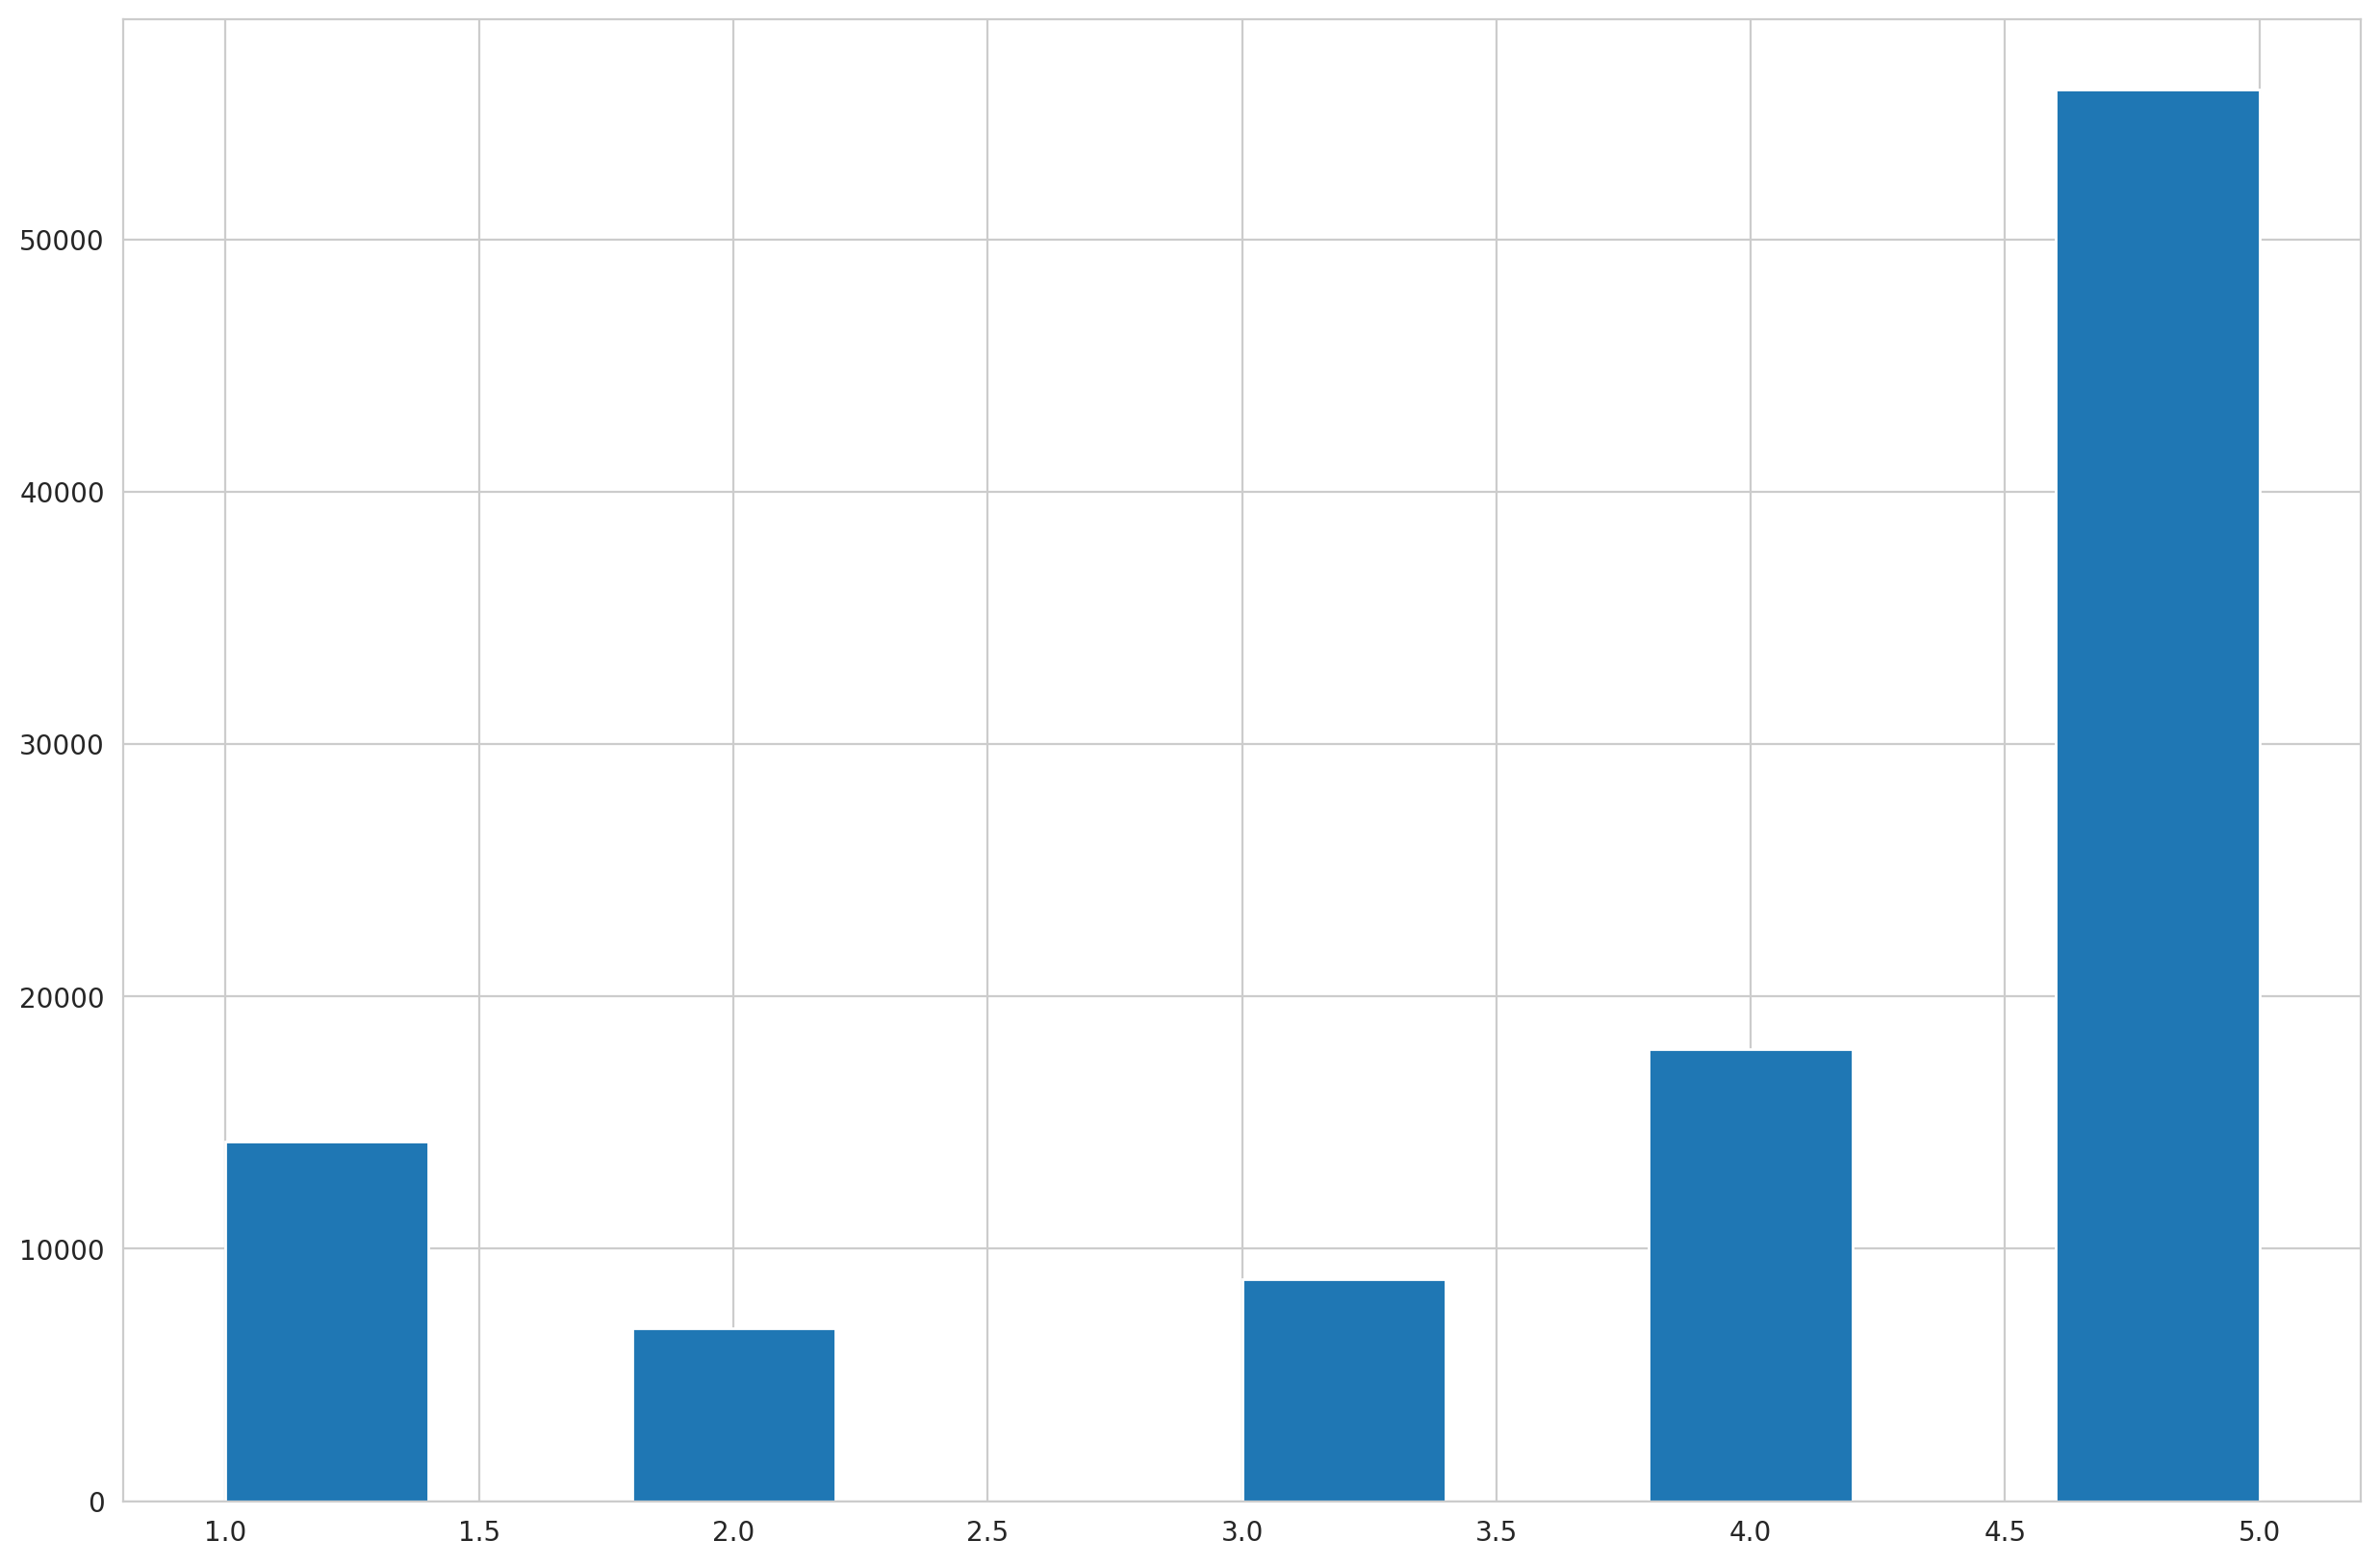

In [359]:
plt.hist(df_nike_reviews2['score'])
plt.show()

## Jumlah review per tahun

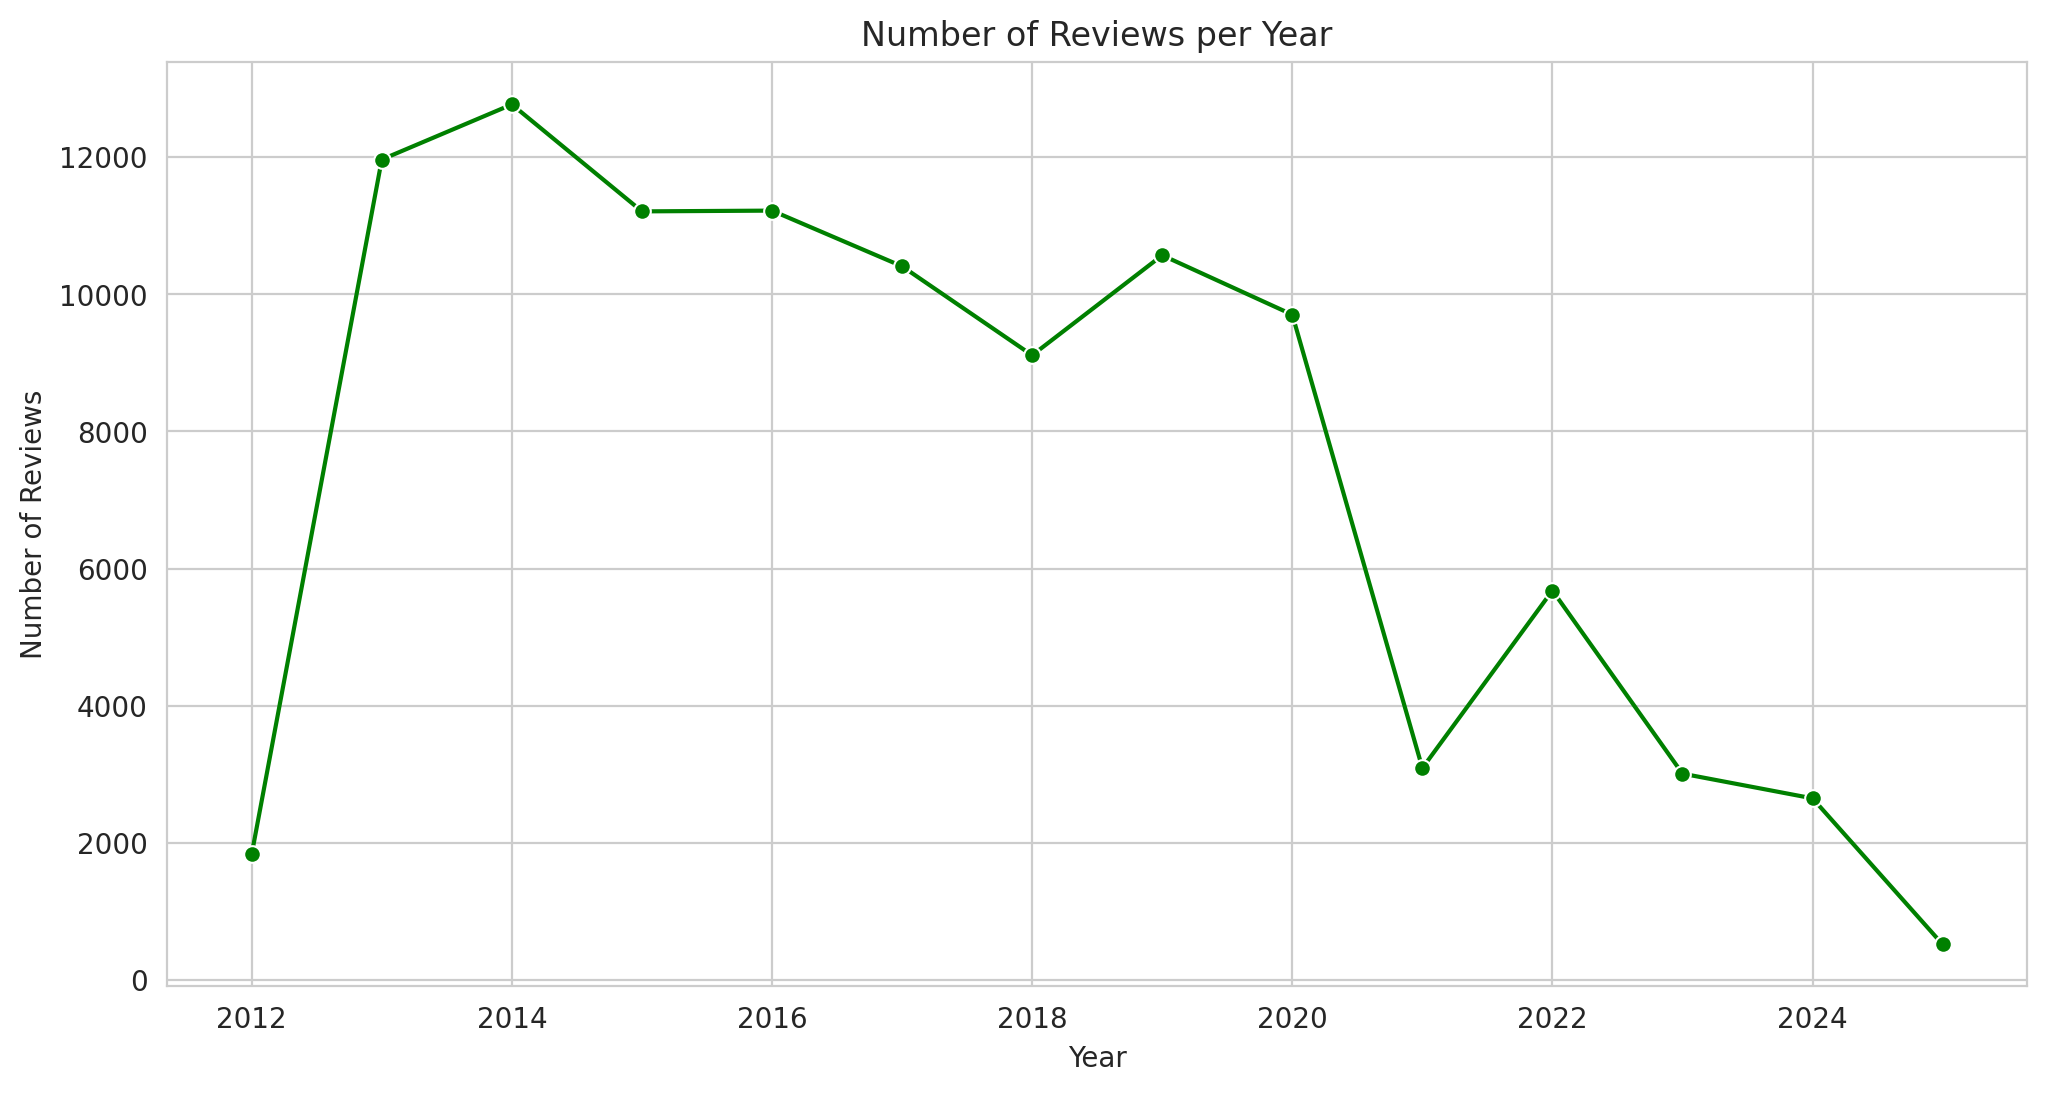

In [360]:
df_nike_reviews2['at'] = pd.to_datetime(df_nike_reviews2['at'])
df_nike_reviews2['year'] = df_nike_reviews2['at'].dt.year
year_counts = df_nike_reviews2['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='green')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

## Jumlah review tiap bulan di setiap tahun

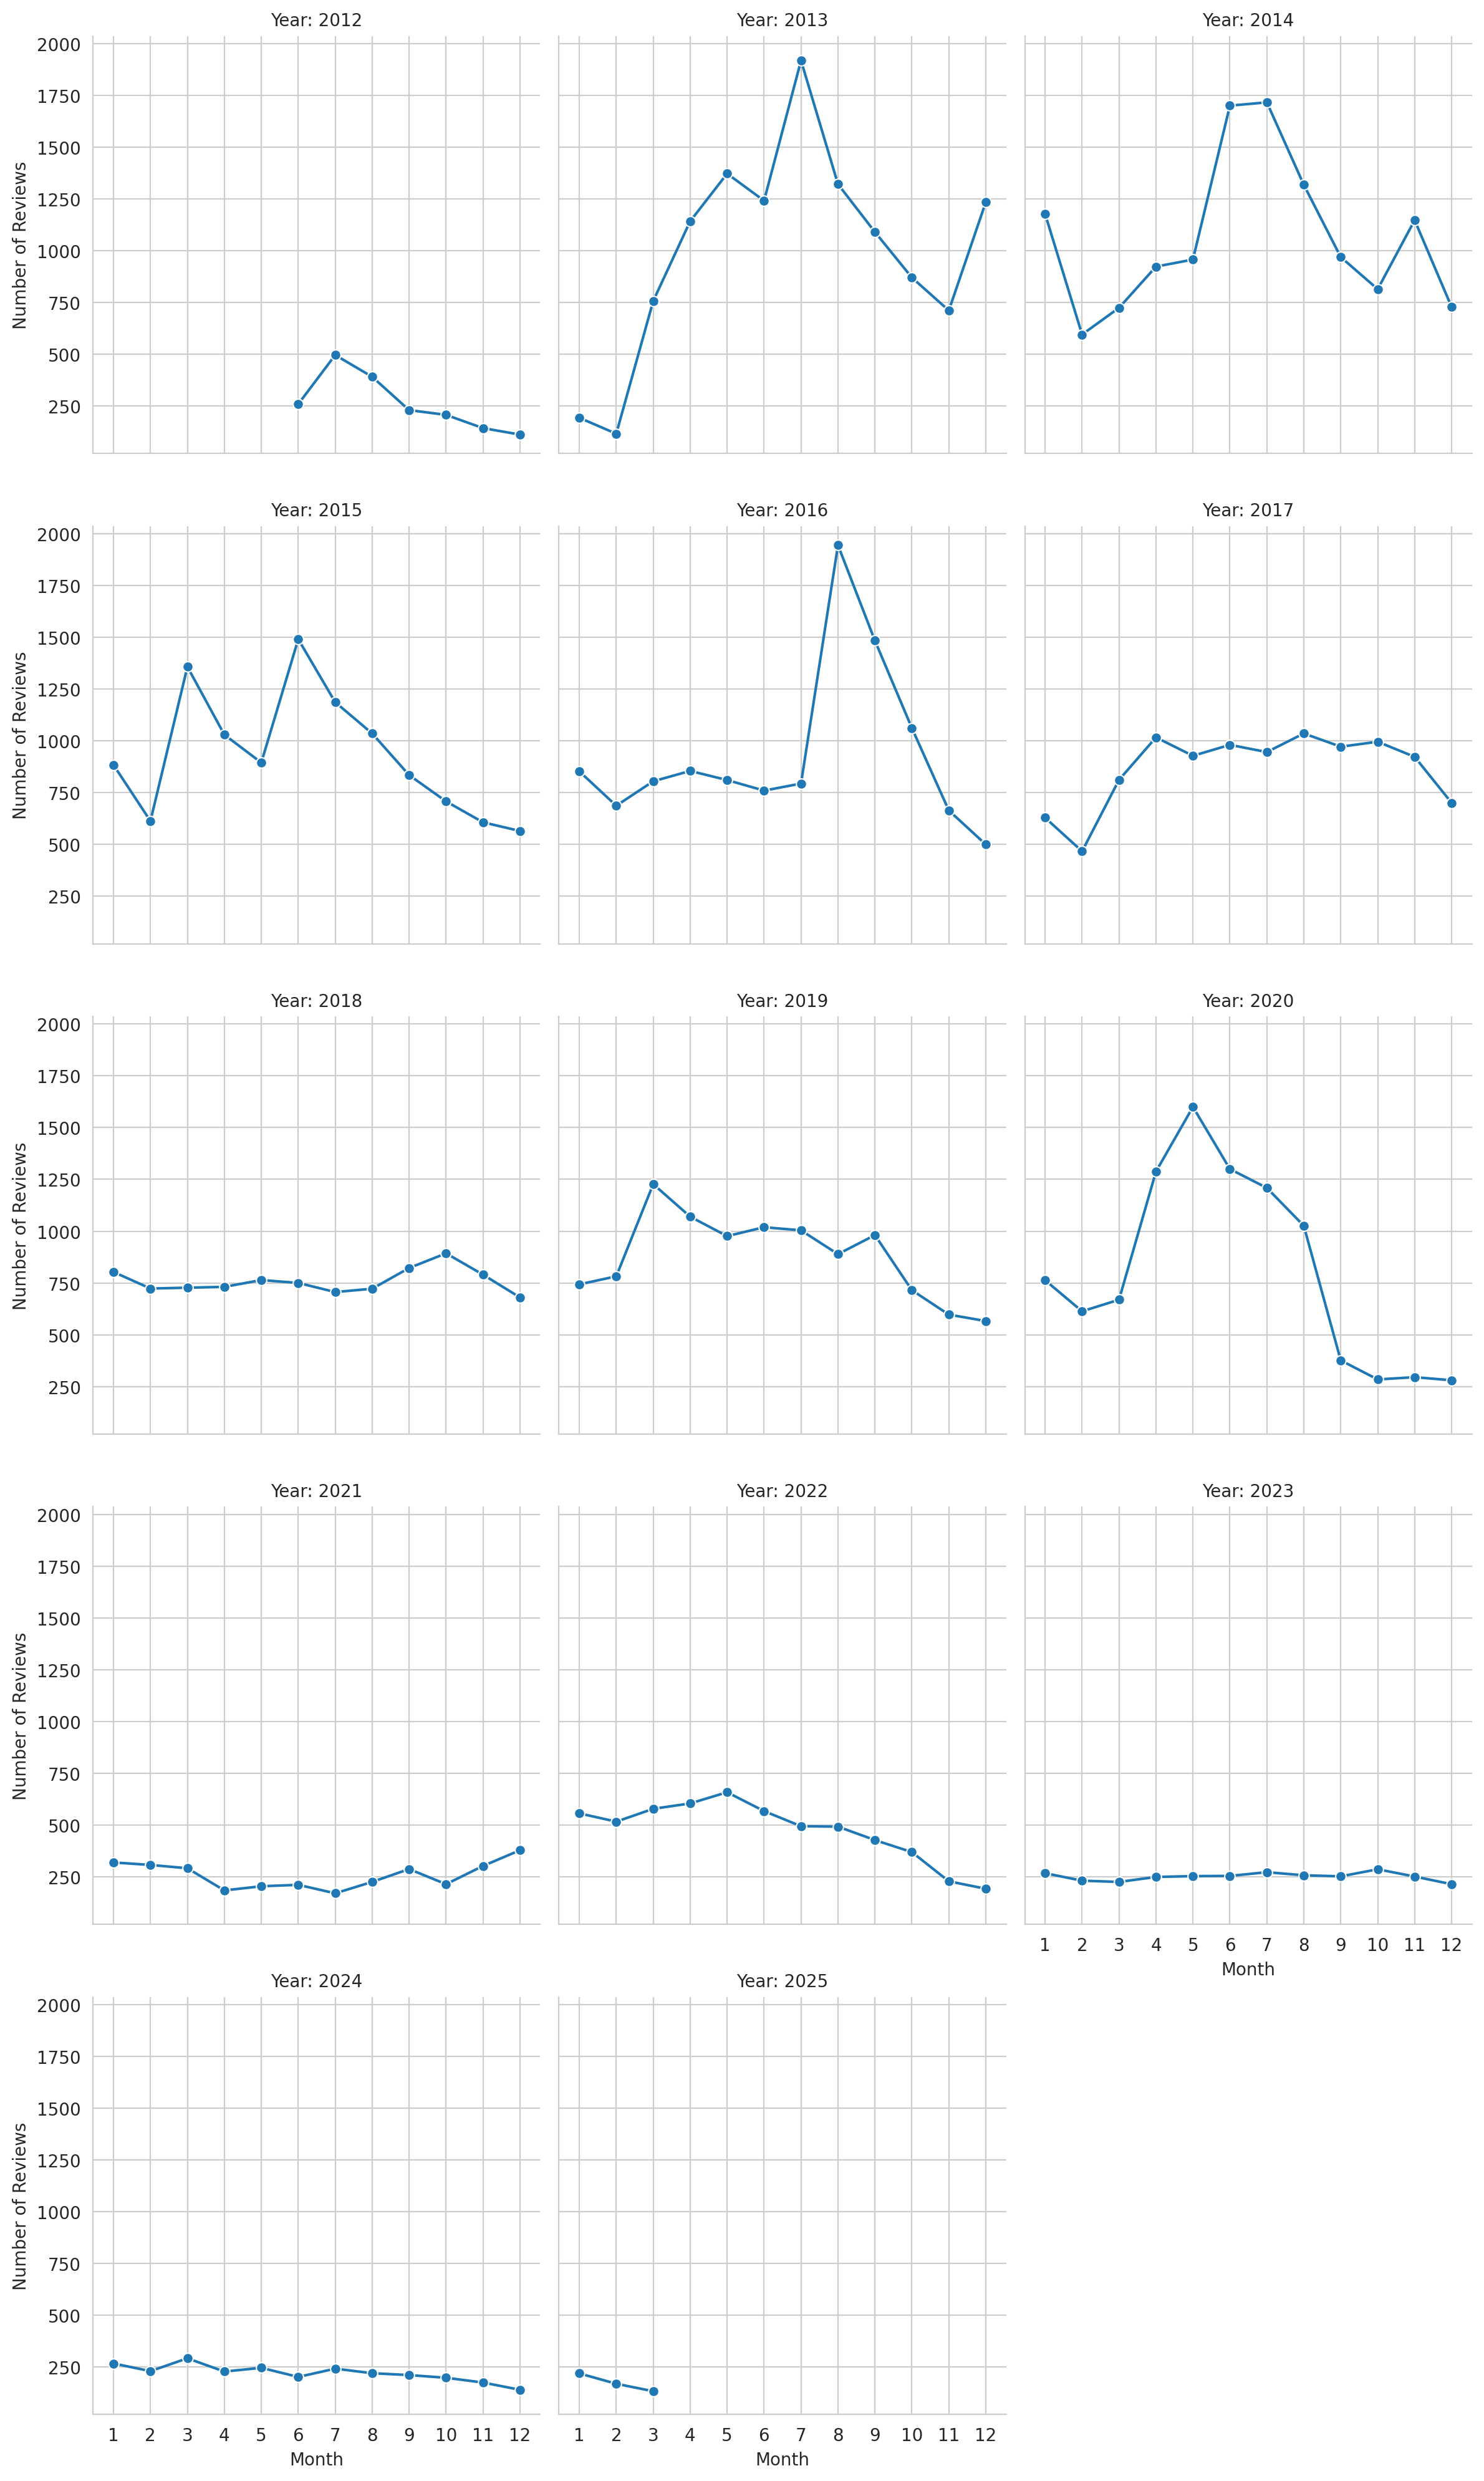

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ekstrak tahun dan bulan
df_nike_reviews2['year'] = df_nike_reviews2['at'].dt.year
df_nike_reviews2['month'] = df_nike_reviews2['at'].dt.month

# Group by year and month and count reviews
reviews_per_month = df_nike_reviews2.groupby(['year', 'month'])['id'].count().reset_index()

# Buat grid plot dengan FacetGrid
g = sns.FacetGrid(reviews_per_month, col='year', col_wrap=3, height=4, sharey=True)
g.map(sns.lineplot, 'month', 'id', marker='o')

# Tambahkan judul & label
g.set_axis_labels("Month", "Number of Reviews")
g.set_titles("Year: {col_name}")
plt.xticks(range(1, 13))  # Pastikan semua bulan muncul

plt.show()

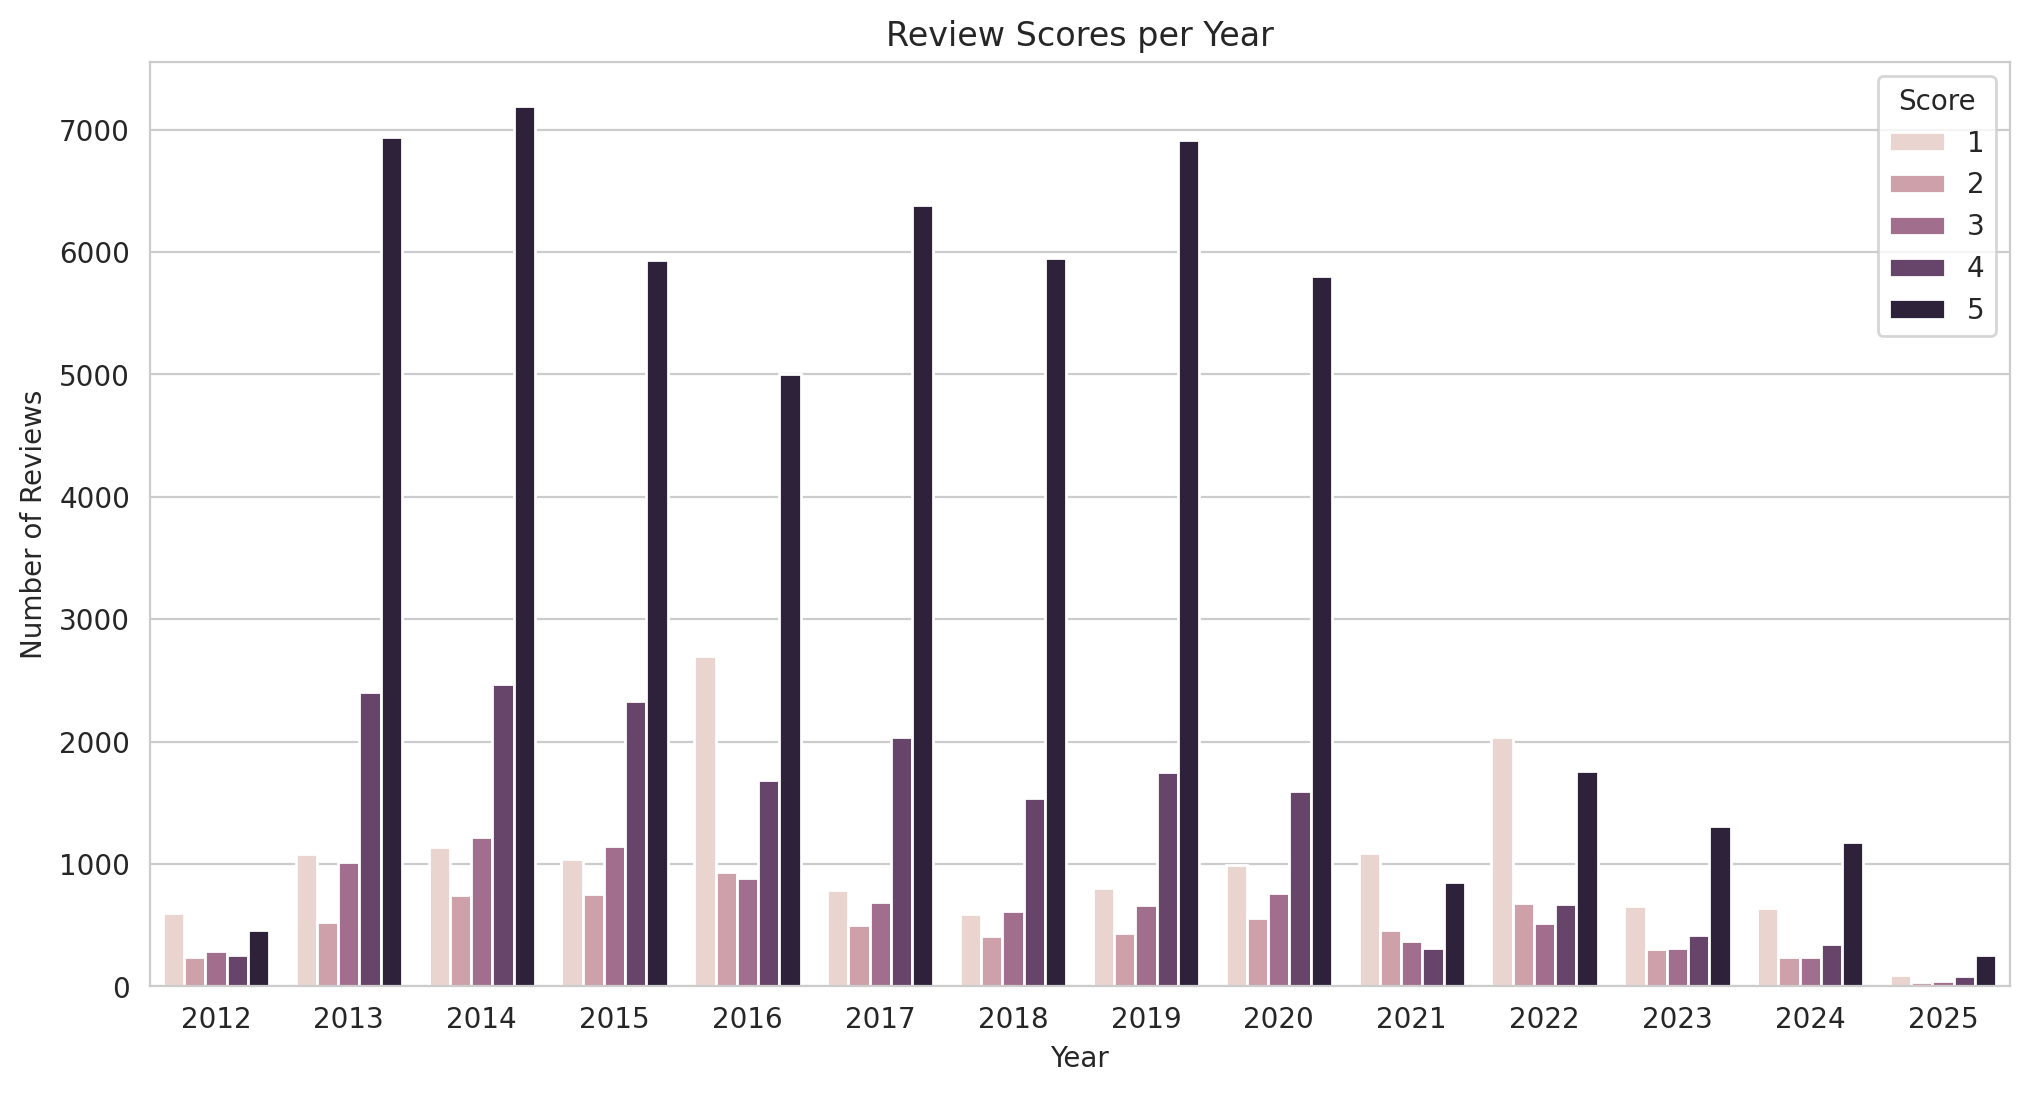

score     1    2     3     4     5
year                              
2012    596  241   290   253   458
2013   1084  523  1016  2403  6939
2014   1140  746  1223  2470  7189
2015   1040  752  1151  2332  5934
2016   2700  938   888  1688  5006
2017    791  505   686  2041  6385
2018    595  413   617  1538  5948
2019    802  437   667  1752  6911
2020    993  556   760  1593  5801
2021   1091  465   371   311   854
2022   2041  684   519   675  1762
2023    655  308   318   419  1311
2024    637  241   244   349  1180
2025     95   37    44    85   260

In [362]:
score_per_year = df_nike_reviews2.groupby(['year', 'score'])['id'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='id', hue='score', data=score_per_year)
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Review Scores per Year')
plt.legend(title='Score')
plt.show()

score_per_year = df_nike_reviews2.groupby('year')['score'].value_counts().unstack(fill_value=0)
score_per_year


## Wordcloud

Frasa negatif dengan kata positif: {'not recommending good', 'not good', 'not coach good', 'not believe good', 'not working good', 'not close good', 'not personal best', 'not make good', 'not excellent', 'not look good', 'no idea best', 'not best', 'not sync nice', 'not sync great', 'not fixed great', 'not log love', 'not wrong love', 'not show good', 'no issue amazing', 'not nothing good', 'not say good', 'not reliable love', 'not broke great', 'no help great', 'not longer good', 'not option great', 'without gas good', 'not change good', 'no good', 'not nearly nice', 'without problem amazing', 'without great love', 'no luck great', 'not believe love', 'not know good', 'not save great', 'not bad good', 'not login great', 'not besides good', 'no not good', 'no avail nice', 'not old good', 'not put best', 'not crash good', 'not another great', 'not good best', 'not amazing', 'no possible great', 'not unlocking best', 'not china love', 'not look nice', 'no near good', 'not otherwise great

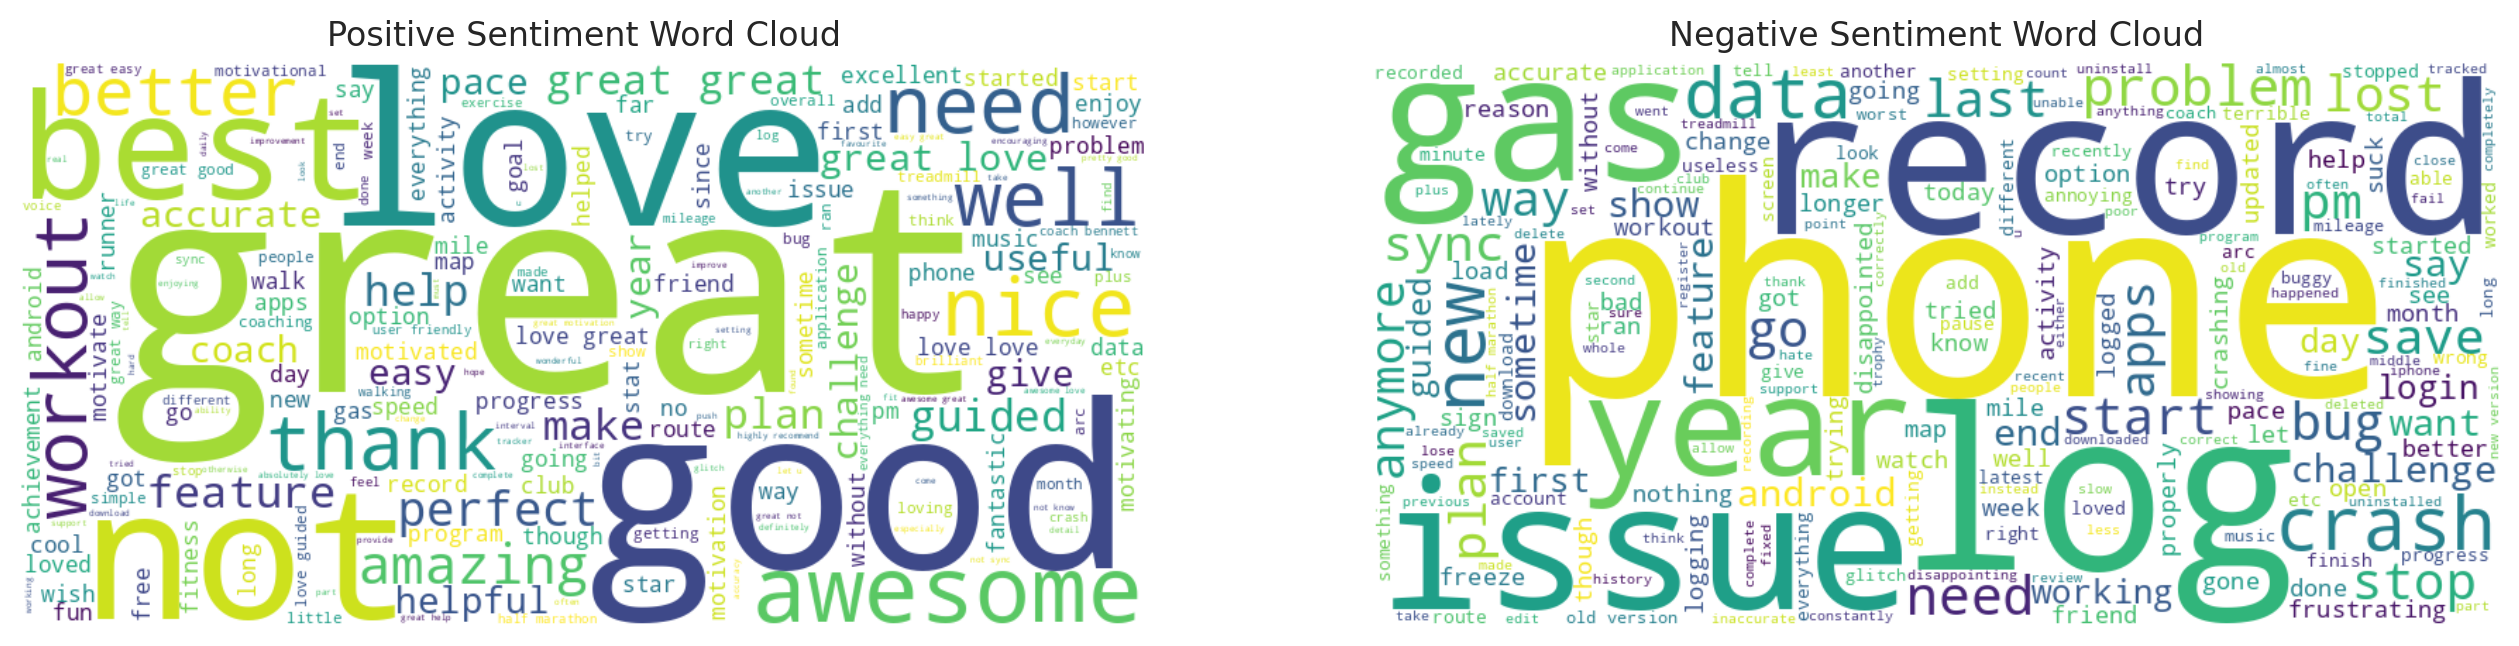

In [375]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Stopwords tambahan (kata-kata positif yang tidak ingin muncul di negatif)
positive_words = {'good', 'great', 'excellent', 'awesome', 'fantastic', 'amazing', 'best', 'nice', 'love', 'perfect'}

# Kata negatif umum yang sering muncul
negative_markers = {'not', 'never', 'barely', 'hardly', 'no', 'without'}

# Gabungkan stopwords tambahan dengan stopwords default WordCloud
all_stopwords = STOPWORDS.union(english_stopwords).union(positive_words)

# Pisahkan review positif dan negatif
positive_reviews = df_nike_reviews2[df_nike_reviews2['sentiment_rating'] == 'Positive']['final_cleaned']
negative_reviews = df_nike_reviews2[df_nike_reviews2['sentiment_rating'] == 'Negative']['final_cleaned']

# Deteksi frasa negatif kompleks (misal: "not really good", "not at all great")
frasa_negatif_kompleks = []
for review in negative_reviews:
    words = review.split()
    for i in range(len(words)):
        # Cek bi-gram (2 kata)
        if i < len(words) - 1 and words[i] in negative_markers and words[i + 1] in positive_words:
            frasa_negatif_kompleks.append(f"{words[i]} {words[i + 1]}")

        # Cek tri-gram (3 kata)
        if i < len(words) - 2 and words[i] in negative_markers and words[i + 2] in positive_words:
            frasa_negatif_kompleks.append(f"{words[i]} {words[i + 1]} {words[i + 2]}")

print("Frasa negatif dengan kata positif:", set(frasa_negatif_kompleks))

# Update stopwords dengan frasa negatif yang terdeteksi
all_stopwords = all_stopwords.union(set(frasa_negatif_kompleks))

# Buat WordCloud untuk sentimen positif dan negatif
positive_wordcloud = WordCloud(
    width=800, height=400, background_color='white', stopwords=english_stopwords
).generate(' '.join(positive_reviews))

negative_wordcloud = WordCloud(
    width=800, height=400, background_color='white', stopwords=all_stopwords
).generate(' '.join(negative_reviews))

# Tampilkan WordCloud untuk positif dan negatif
plt.figure(figsize=(16, 8))

# WordCloud Positif
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")

# WordCloud Negatif
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")

plt.show()


In [376]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
